<a href="https://colab.research.google.com/github/rinaove/KAGGLE/blob/main/%EB%84%88%EB%8B%A4%EB%82%98%EB%B9%84_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%B6%94%EA%B0%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 탐색

### 1.1 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/drive/MyDrive/dataset/asset/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv(args.train_csv)
test = pd.read_csv(args.test_csv)
submission = pd.read_csv(args.submission_csv)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


결측치: Age, Cabin, Embarked

### 1.2 이상치 제거

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
def detect_outliers(df, n, features):
  outlier_indices = []

  # iterate over features(columns)
  for col in features:
    # 1st quartile (25%)
    Q1 = np.percentile(df[col], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[col], 75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # outlier step
    outlier_step = 1.5 * IQR

    # Determine a list of indices of outliers for feature col
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

    # append the found outlier indices for col to the list of outlier indices
    outlier_indices.extend(outlier_list_col)

  # select observations containing more than 2 outliers (중복)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

  return multiple_outliers

# detect outliers from Age, SibSp, Parch, and Fare
Outliers_to_drop = detect_outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"])

In [ ]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [ ]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


이상치가 2개 이상인 행 제외: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

### 1.3 데이터셋 합치기

In [ ]:
train_len = len(train)
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

### 1.4 결측치

In [ ]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


## 2. 변수 확인

### 2.1 수치형 변수

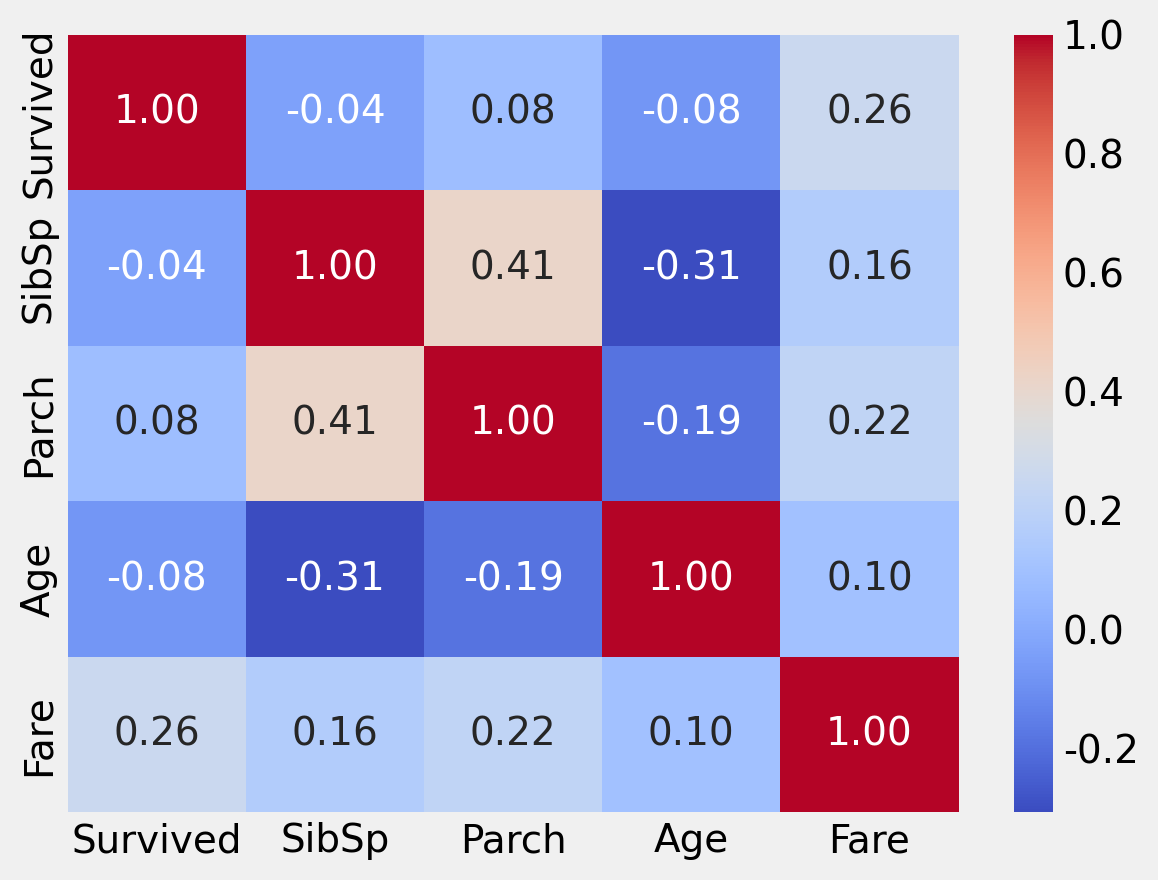

In [ ]:
g = sns.heatmap(train[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")

Fare 피쳐가 생존율과 유의미한 관련이 있음

다른 피쳐가 의미 없다는 것은 아니며, 추가적으로 살펴볼 필요가 있다는 점 시사

**SibSp**

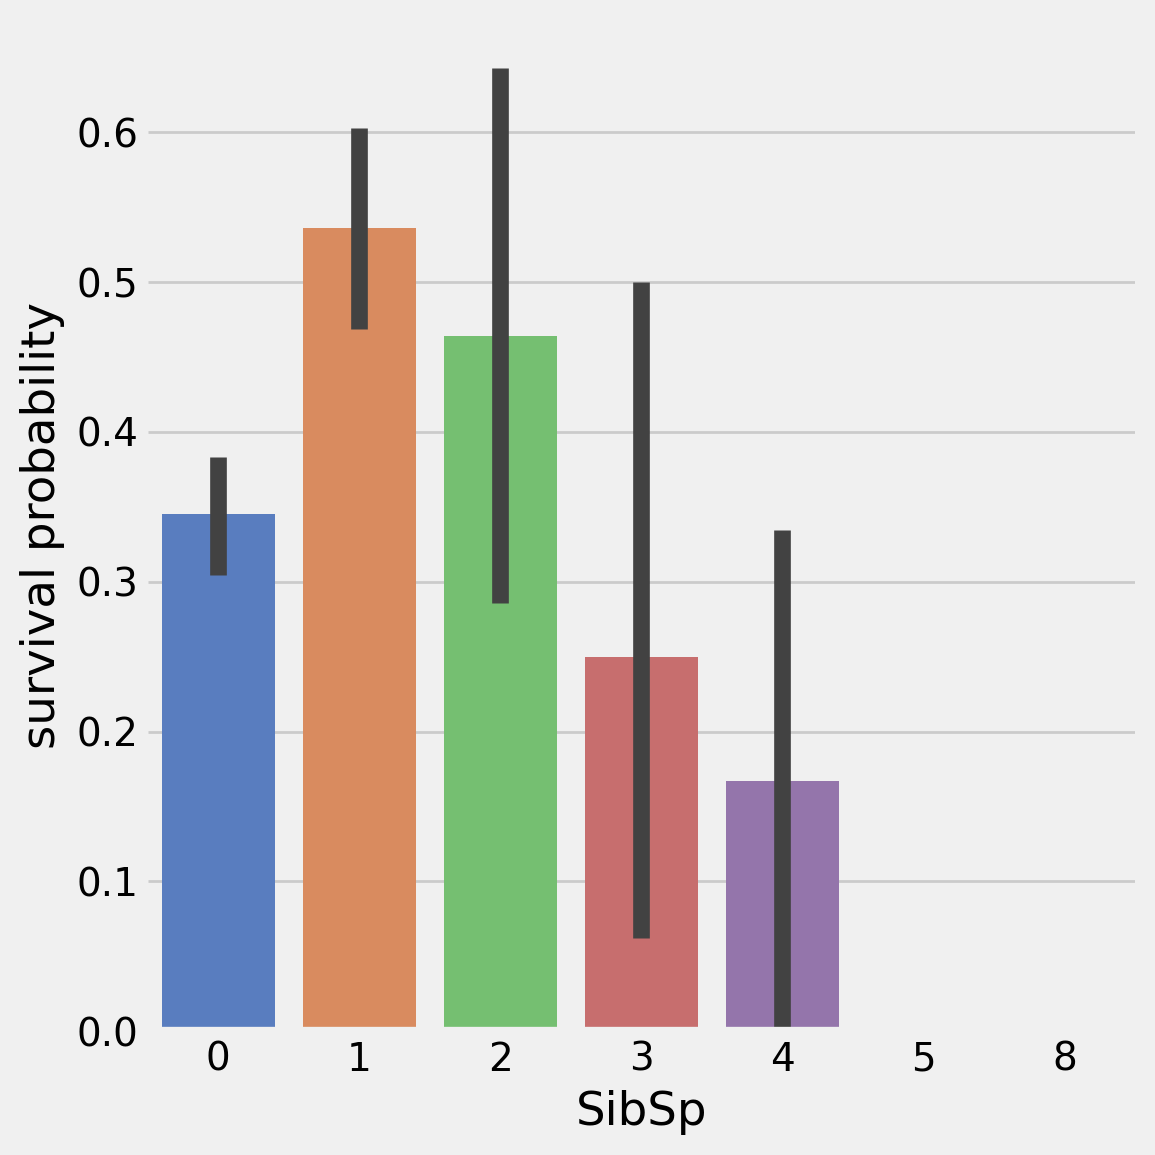

In [ ]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

SibSp(형제+배우자)수가 3명 이상부터 생존율이 현저하게 떨어짐 -> 피쳐 엔지니어링에서 고려

**Parch**

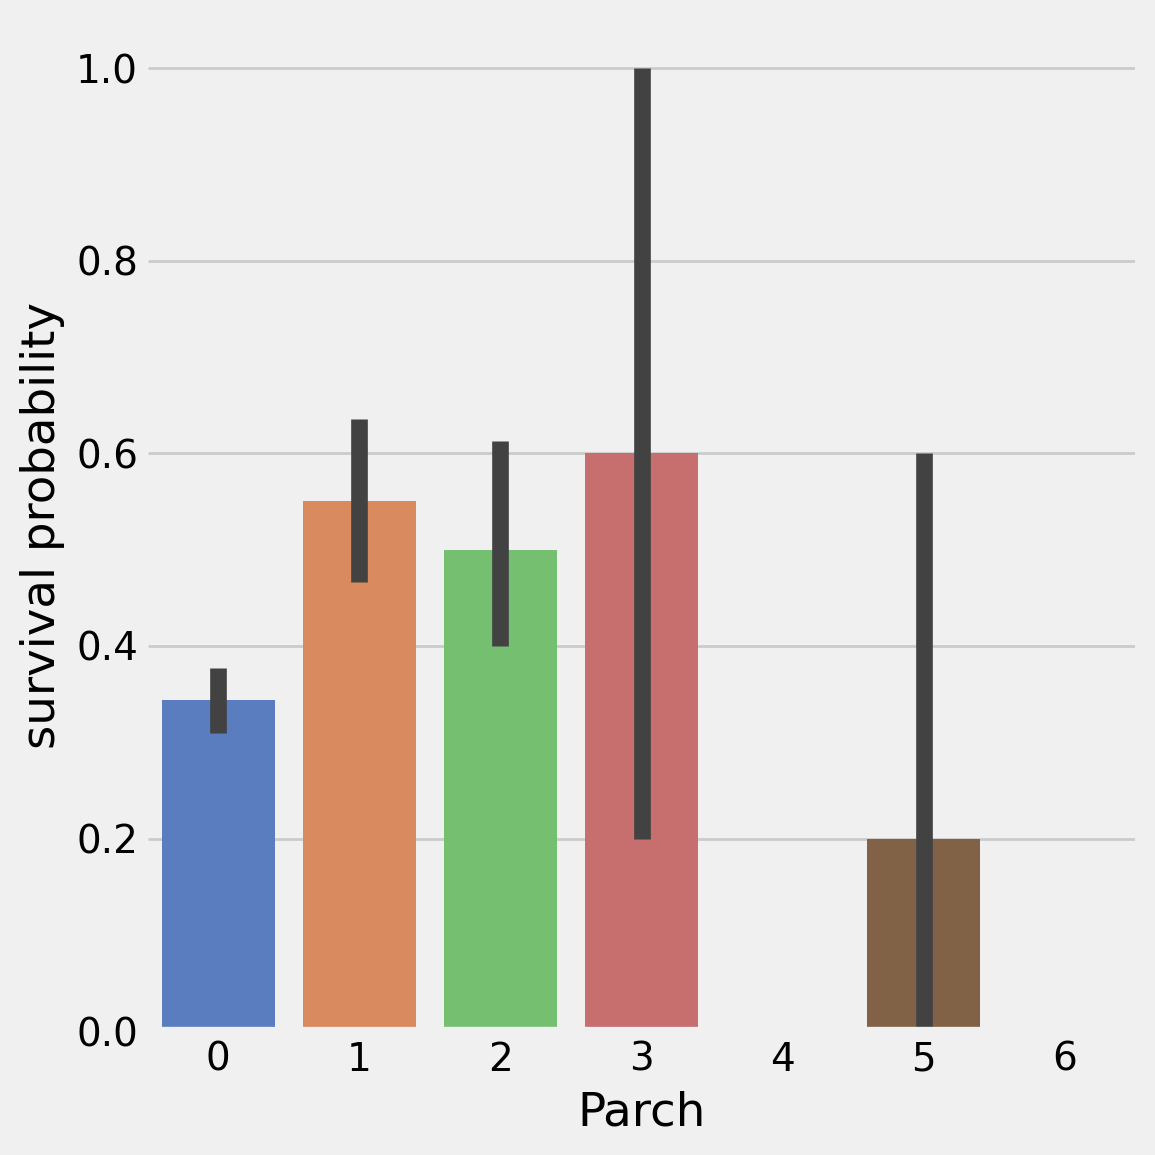

In [ ]:
# Explore Parch feature vs Survived

g = sns.catplot(x="Parch", y="Survived", data=train, kind="bar", height=6,palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Parch(부모+아이) 수가 4명 이상일수록 생존율이 급감

Parch(부모+아이) 수가 3명일 때 분산이 큼

**Age**

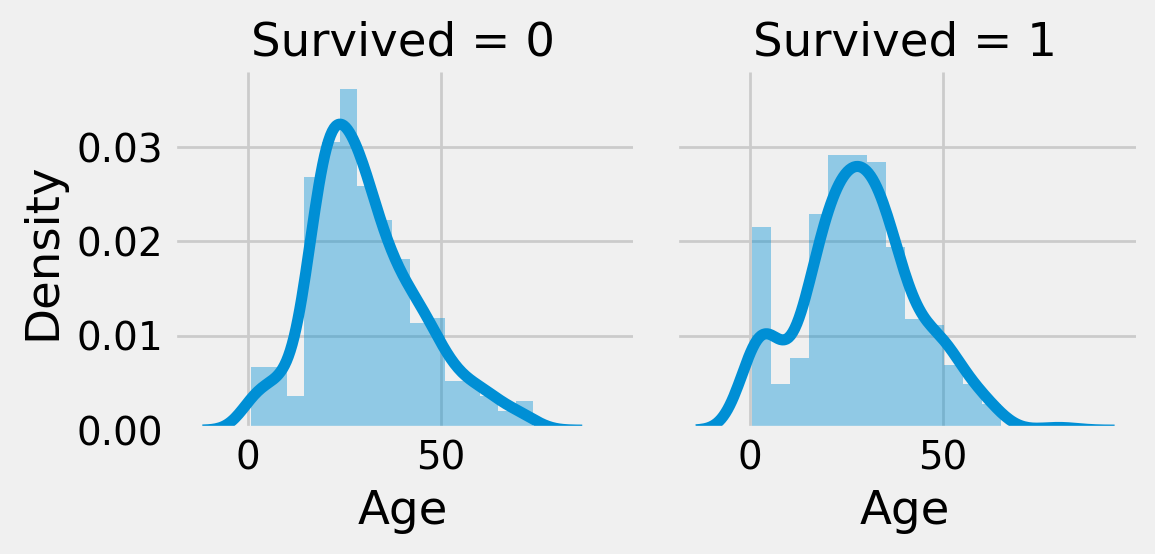

In [ ]:
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

두 그래프 모두 정규분포처럼 보임

비슷해보이나, 나이가 어리거나 많은 승객들 간 차이가 보임

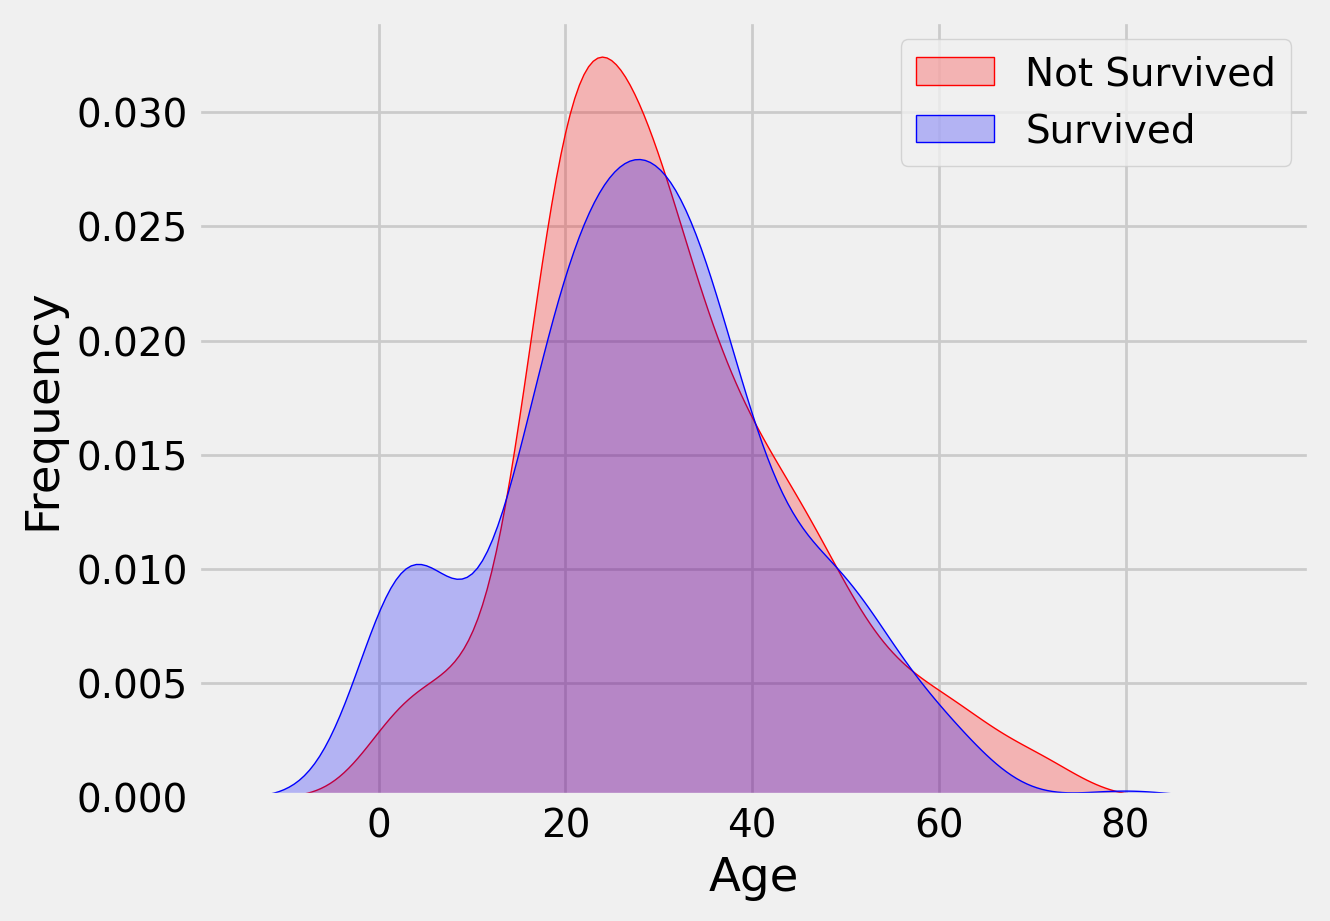

In [ ]:
# Explore Age distribution
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade=True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax=g, color="Blue", shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived", "Survived"])

**Fare**

In [ ]:
dataset["Fare"].isnull().sum()

np.int64(1)

In [ ]:
# Fill Fare missing values with the median value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

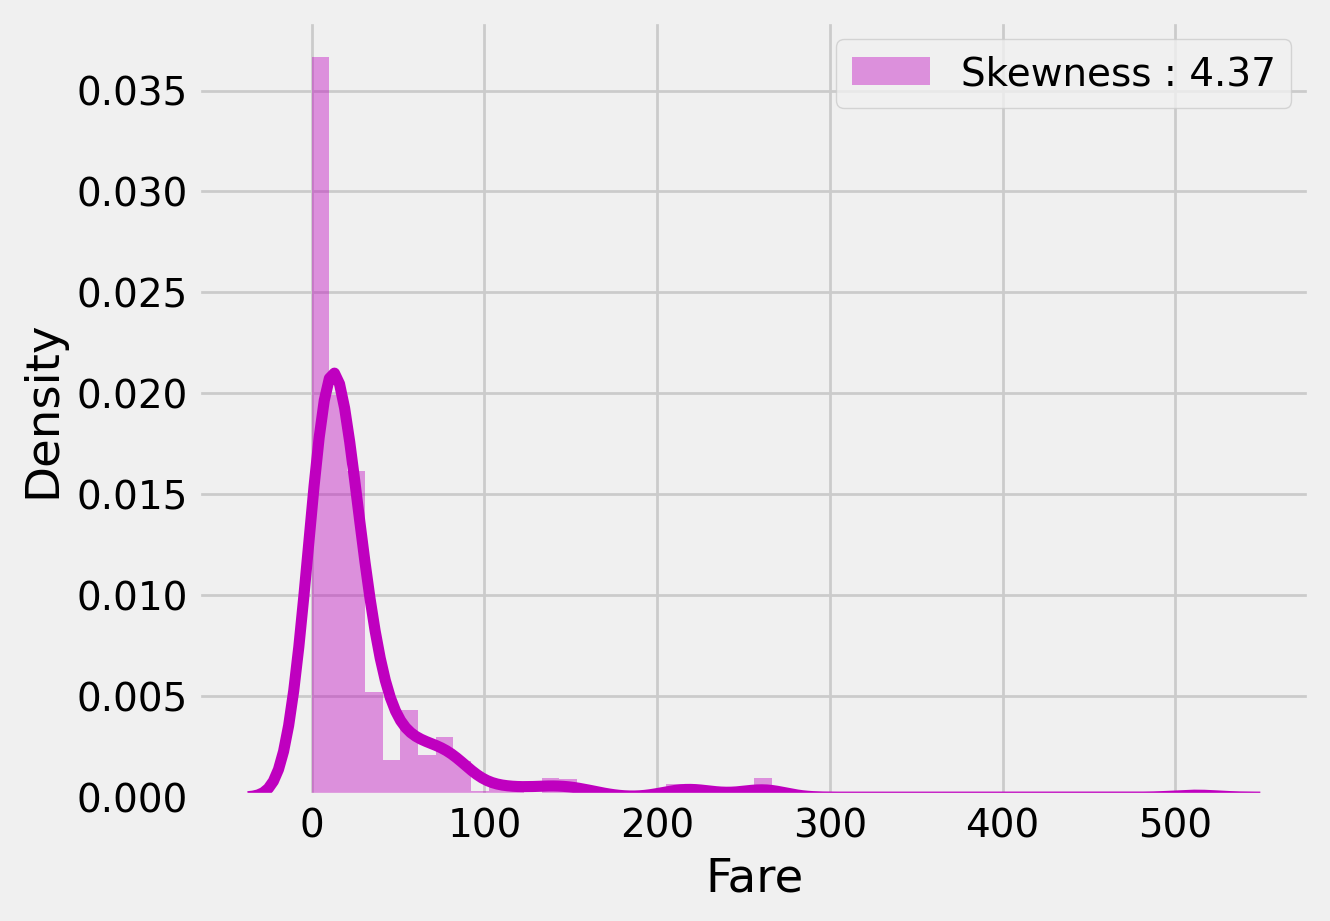

In [ ]:
# Explore Fare distribution
g = sns.distplot(dataset["Fare"], color='m', label="Skewness : %.2f"%dataset["Fare"].skew())
g = g.legend(loc="best")

In [ ]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

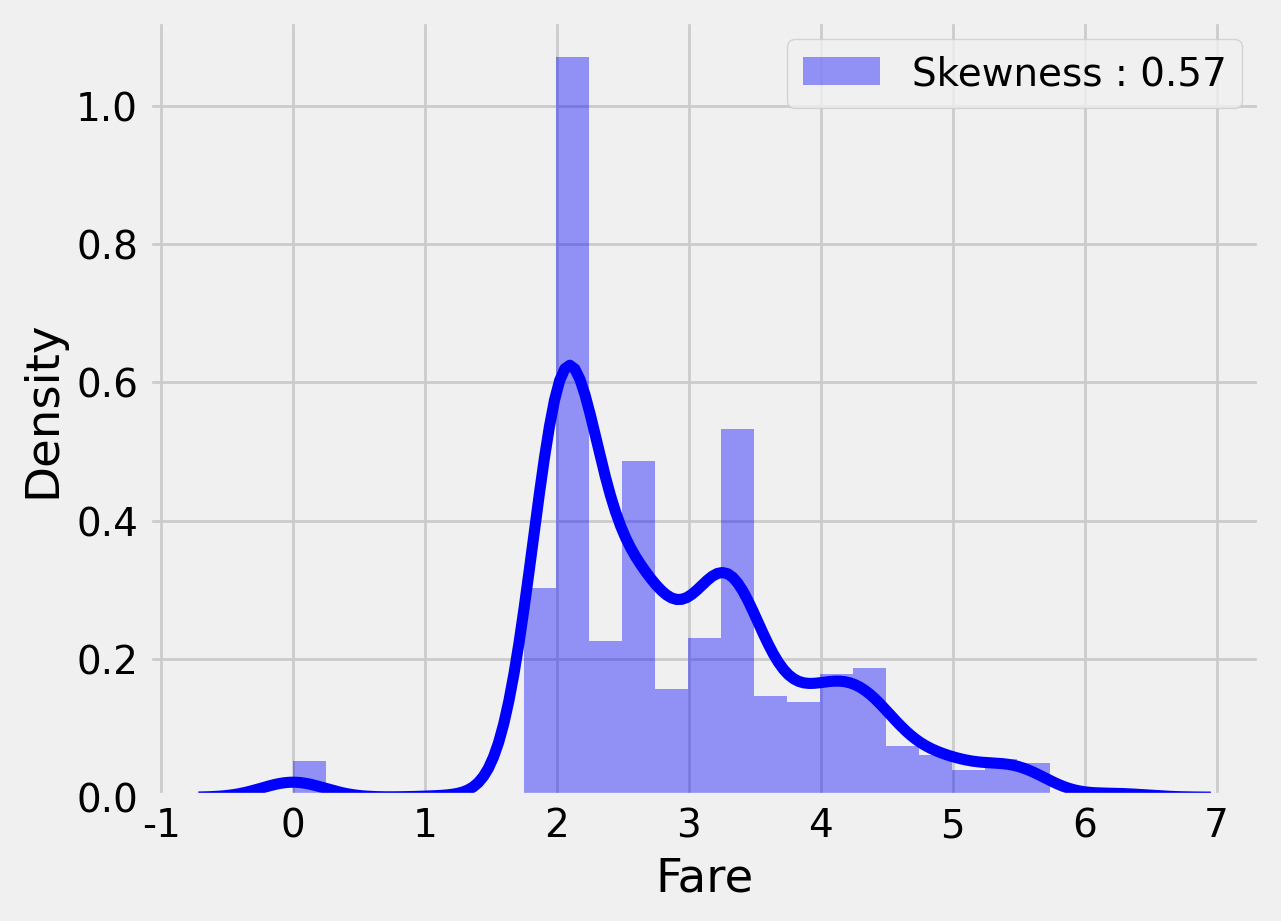

In [ ]:
g = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

### 2.2 범주형 변수

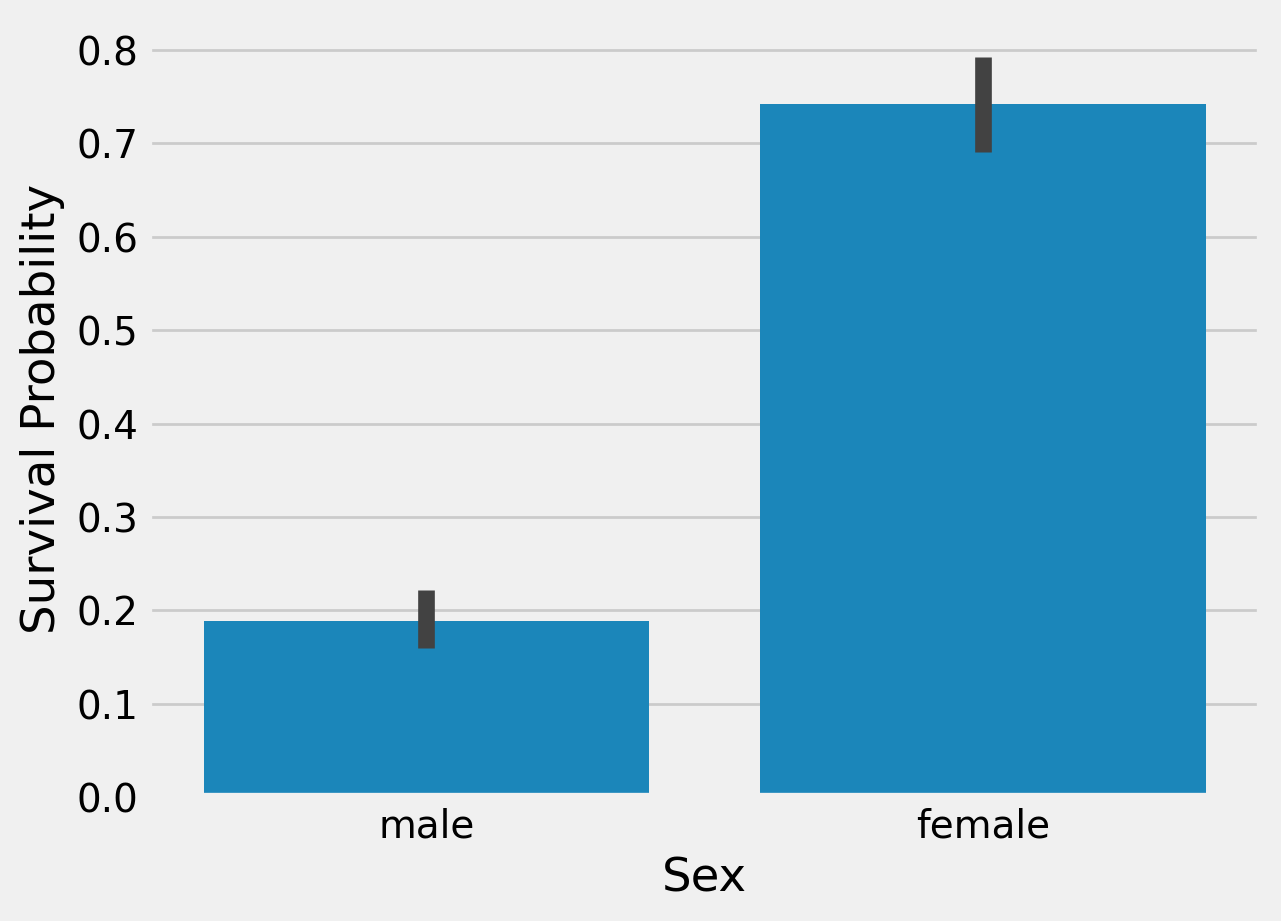

In [ ]:
g = sns.barplot(x="Sex", y="Survived", data=train)
g = g.set_ylabel("Survival Probability")

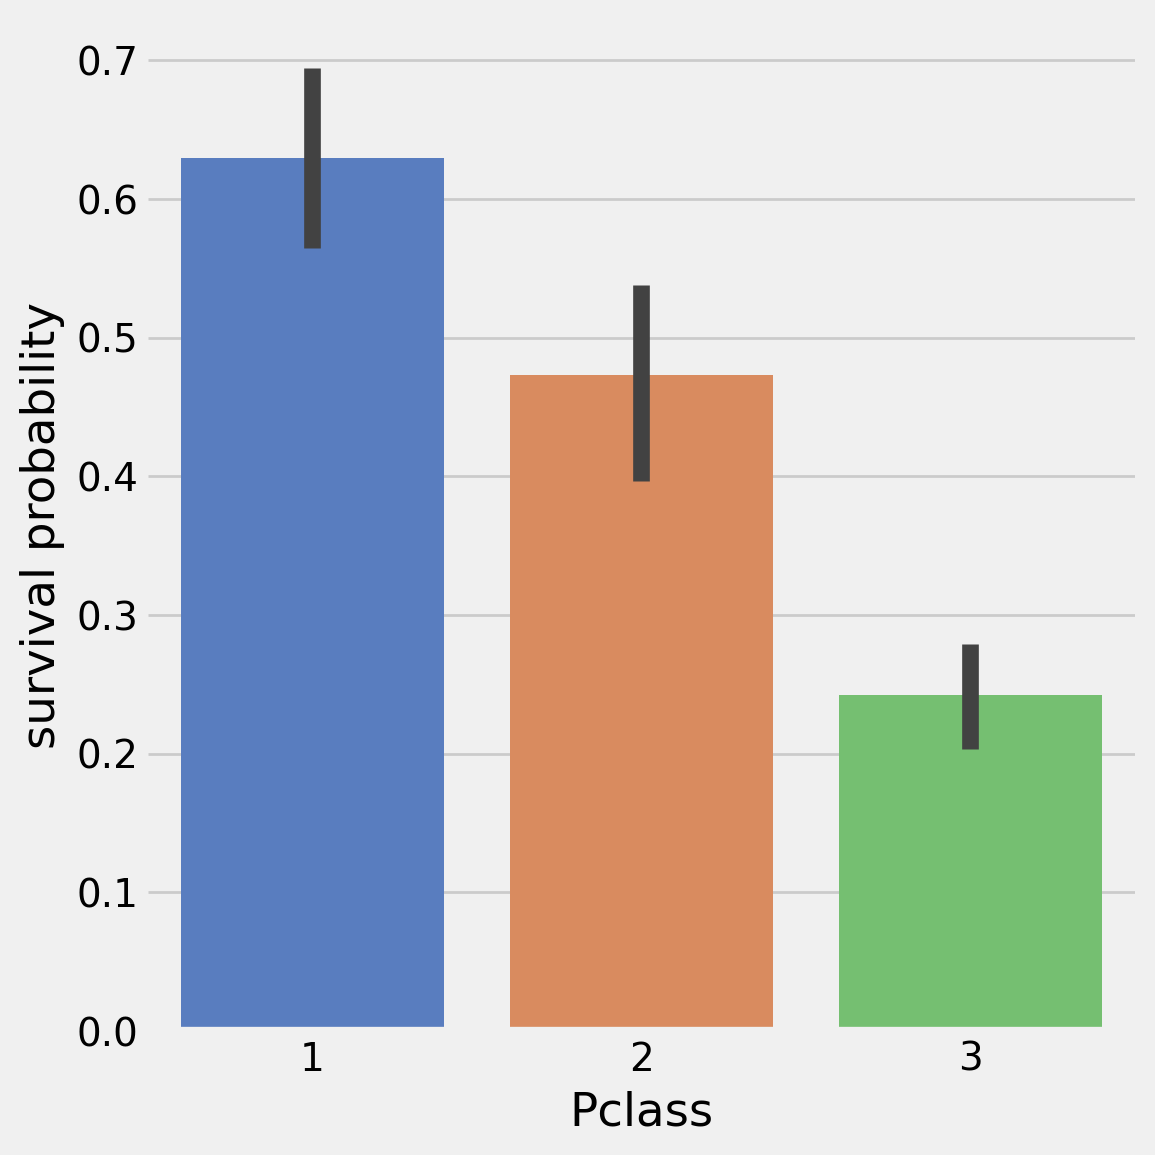

In [ ]:
# Explore Pclass vs Survived

g = sns.catplot(x="Pclass",y="Survived",data=train,kind="bar",height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

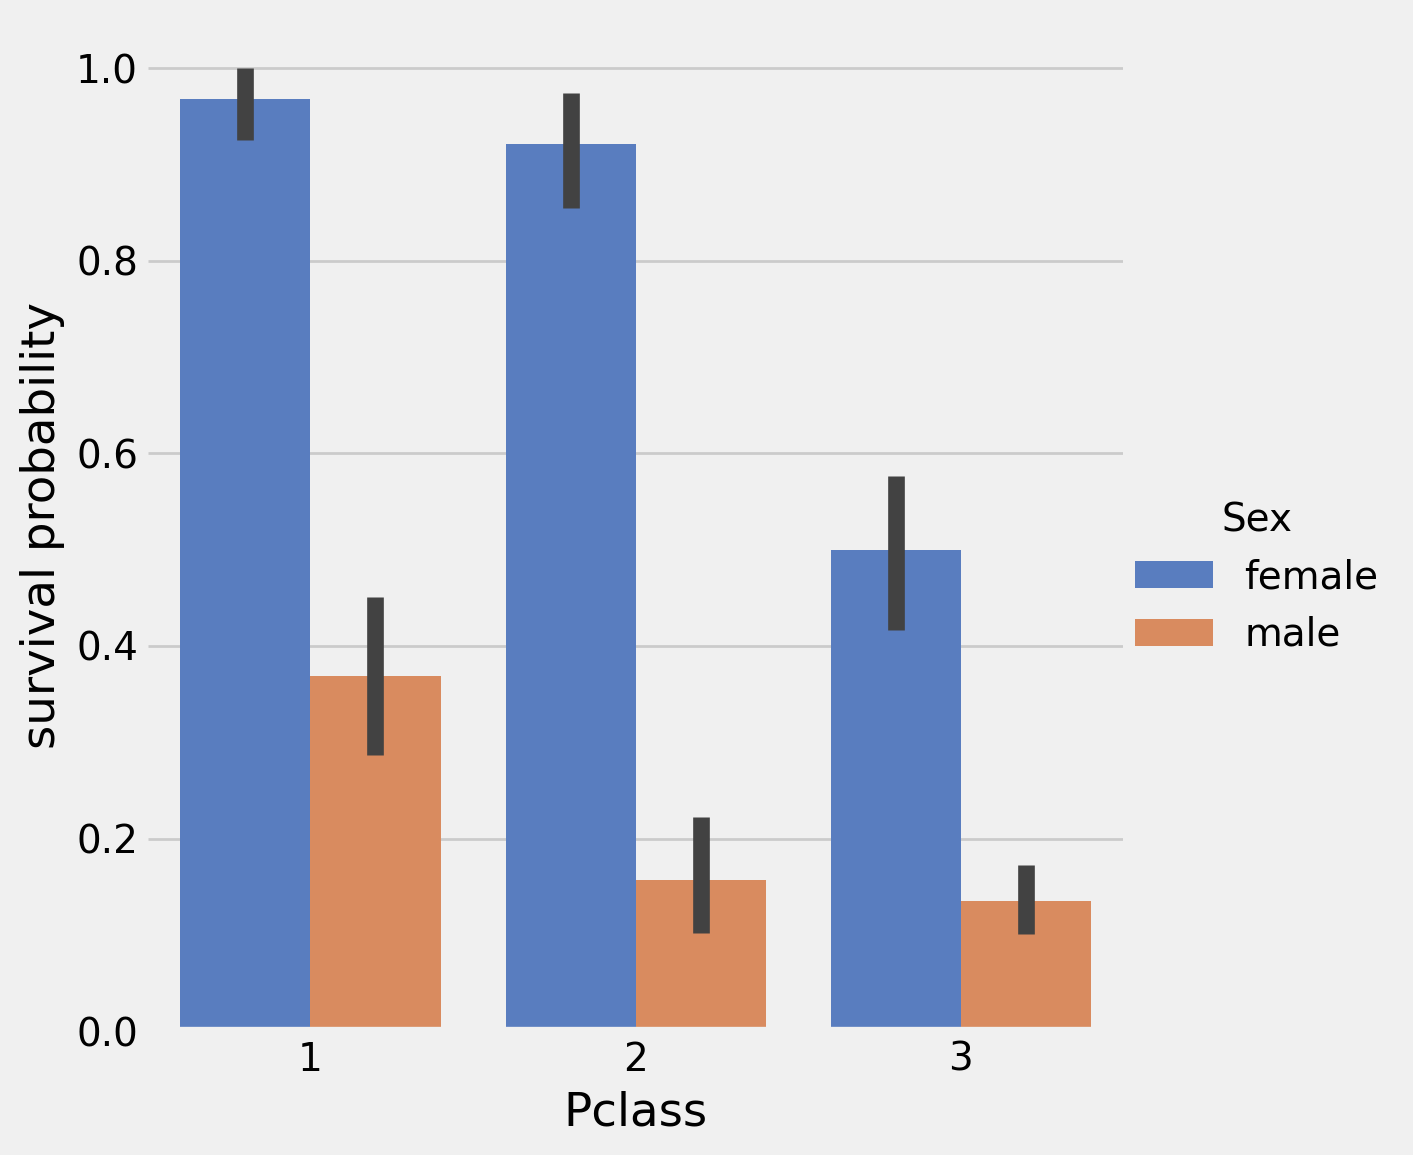

In [ ]:
# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [ ]:
dataset["Embarked"].isnull().sum()

np.int64(2)

In [ ]:
# Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

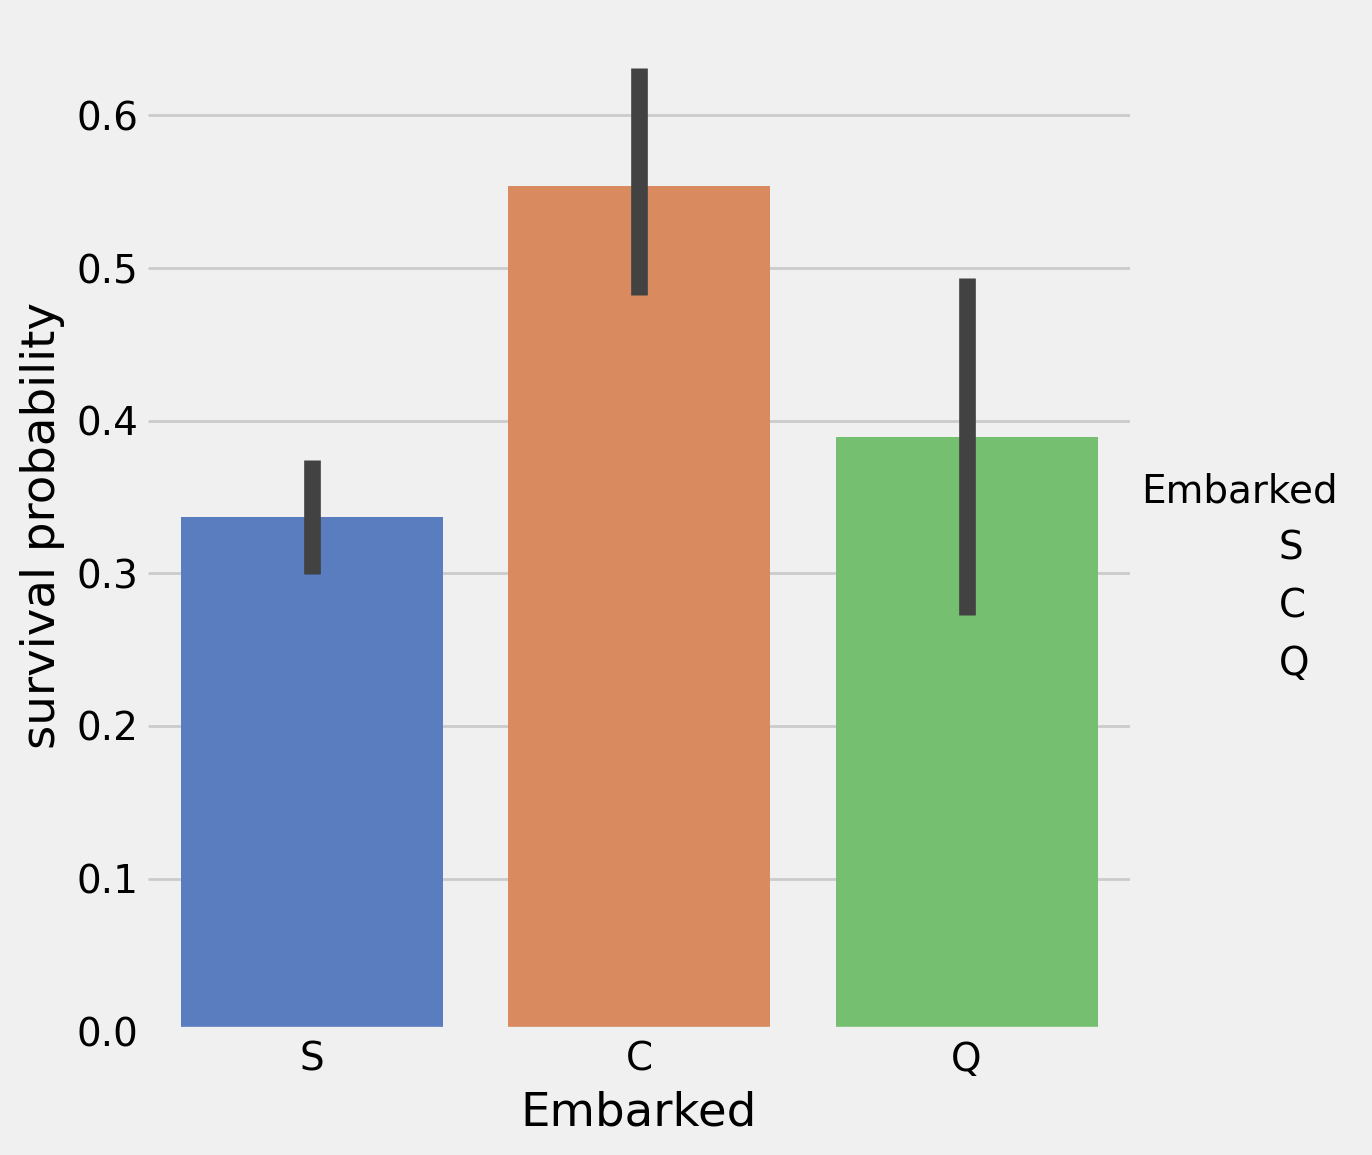

In [ ]:
# Explore Embarked vs Survived
g = sns.catplot(x="Embarked", y="Survived", data=train, height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

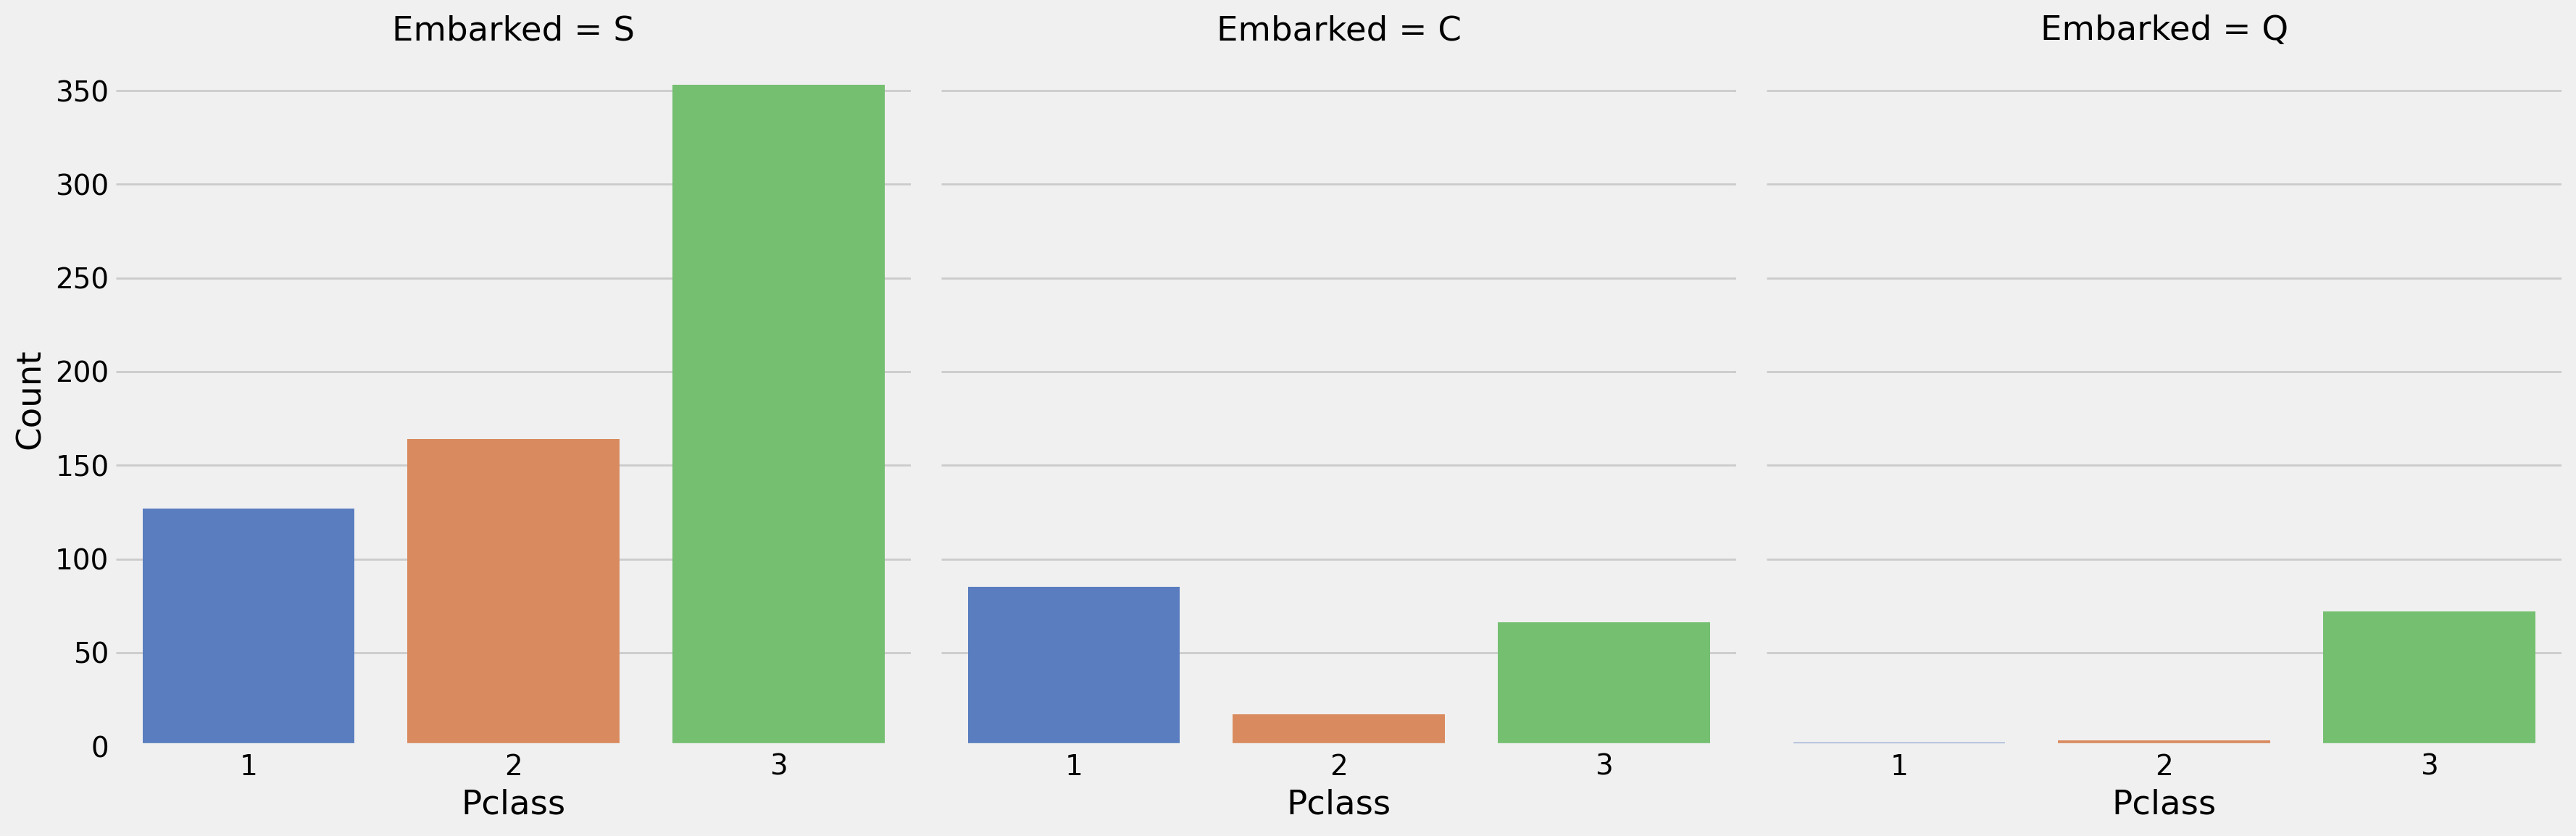

In [ ]:
# Explore Pclass vs Embarked
g = sns.catplot(x="Pclass", col="Embarked", data=train, height=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

## 3. 결측값 처리

Age는 결측값이 많으나, subpopulation 차이가 유의미한 결과도 있었기에 열 삭제는 안함

결측값 보완을 위해 Age와 연관있는 피쳐 선발 후 분석

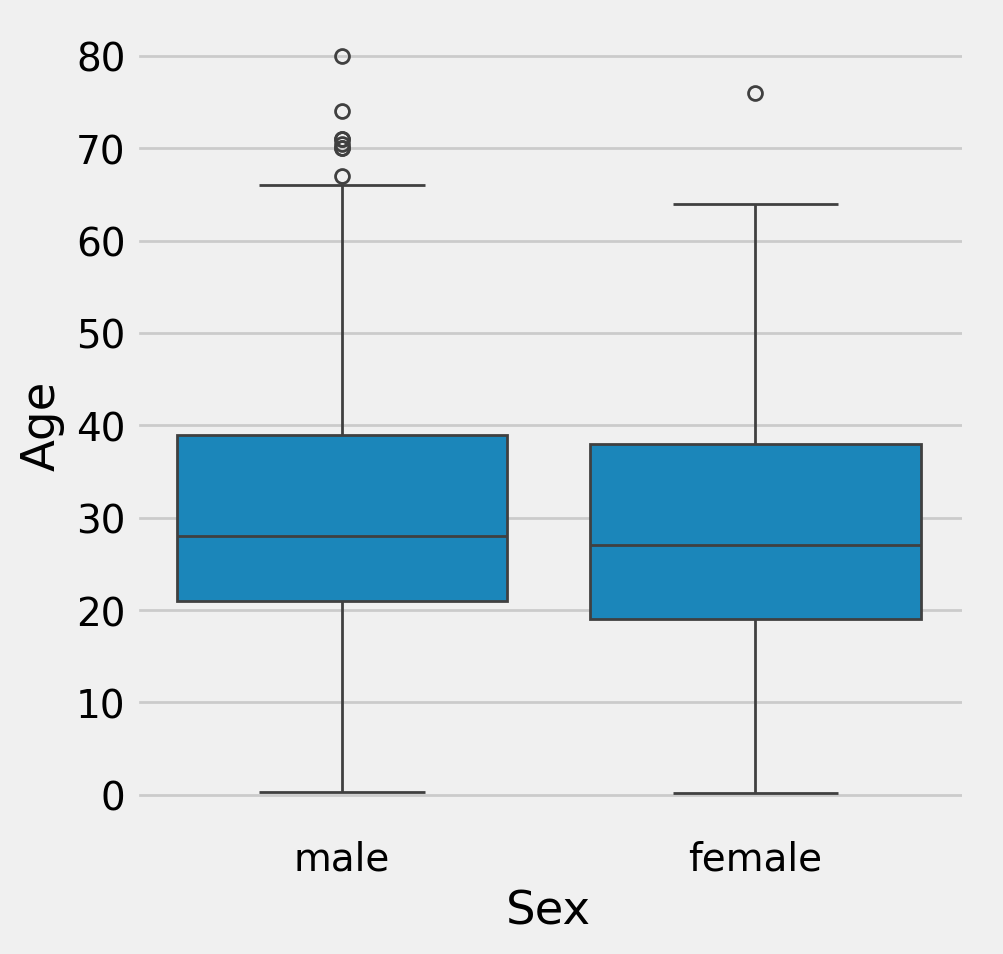

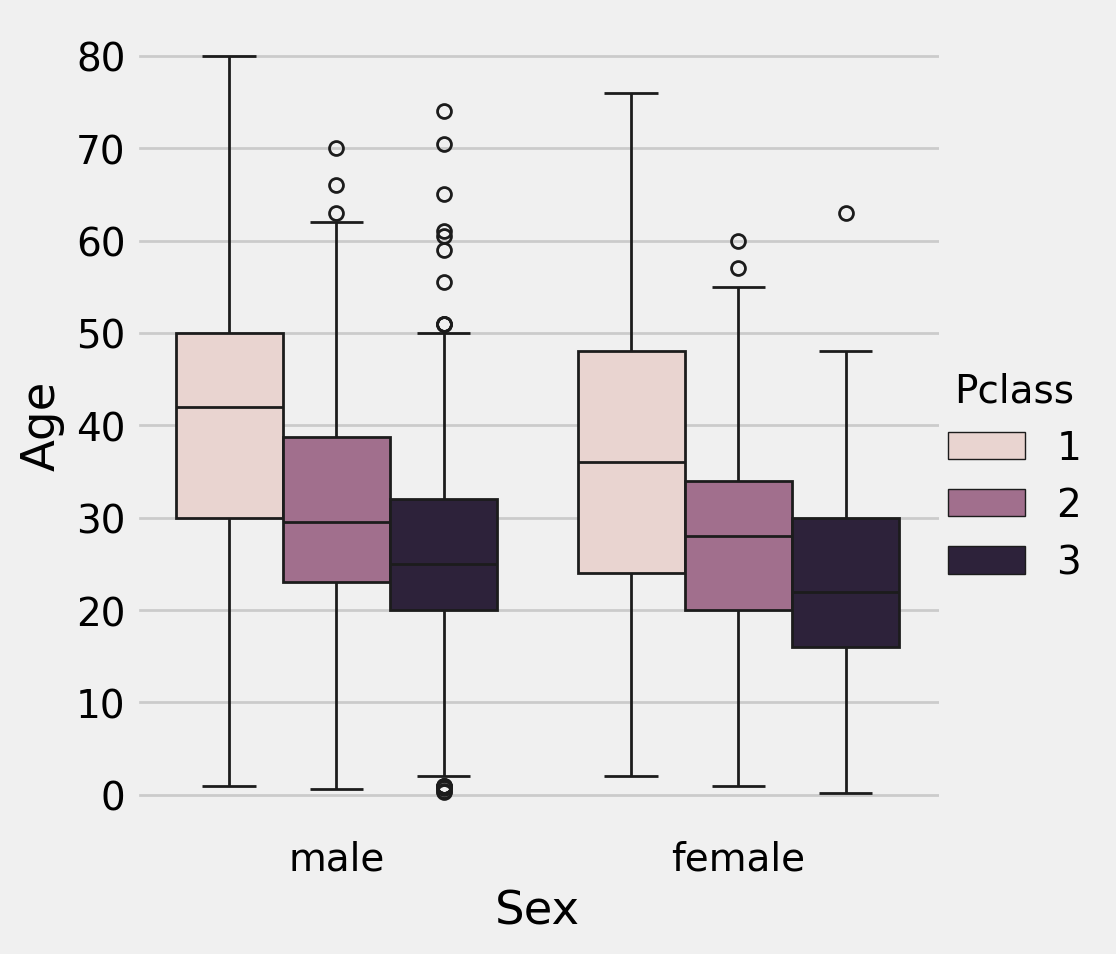

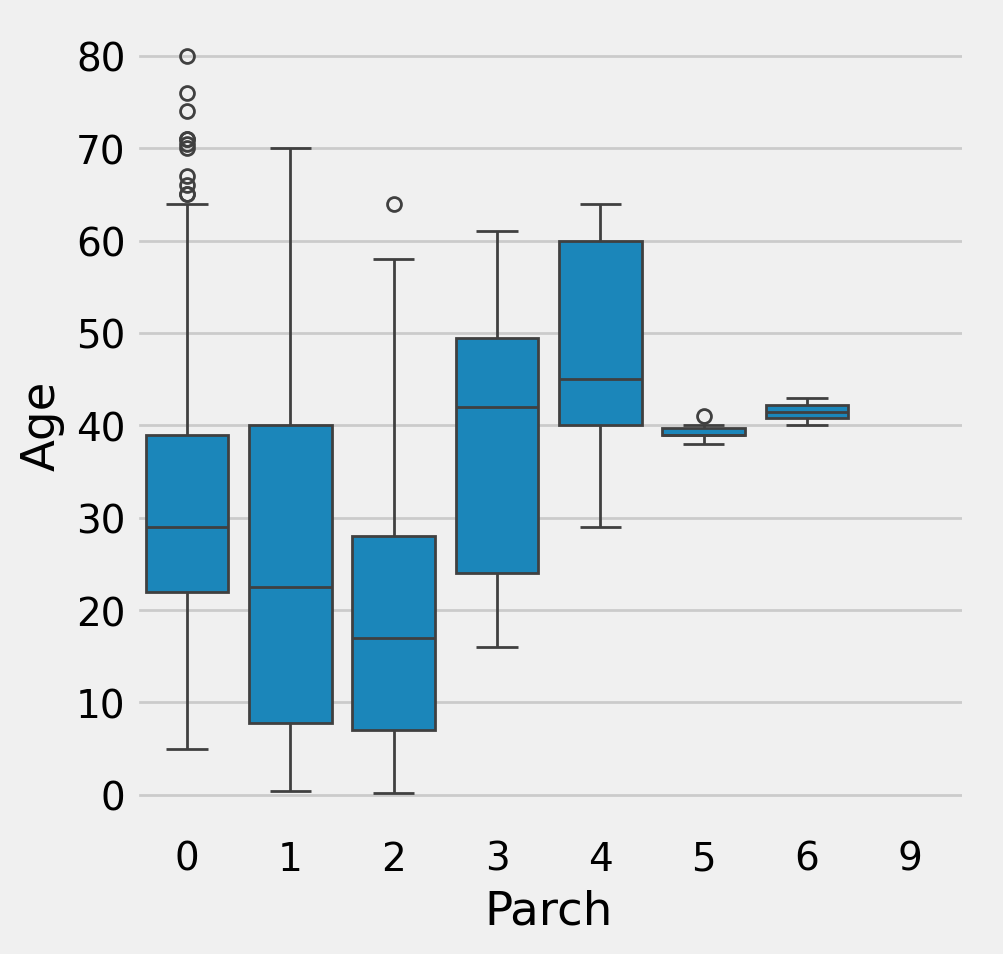

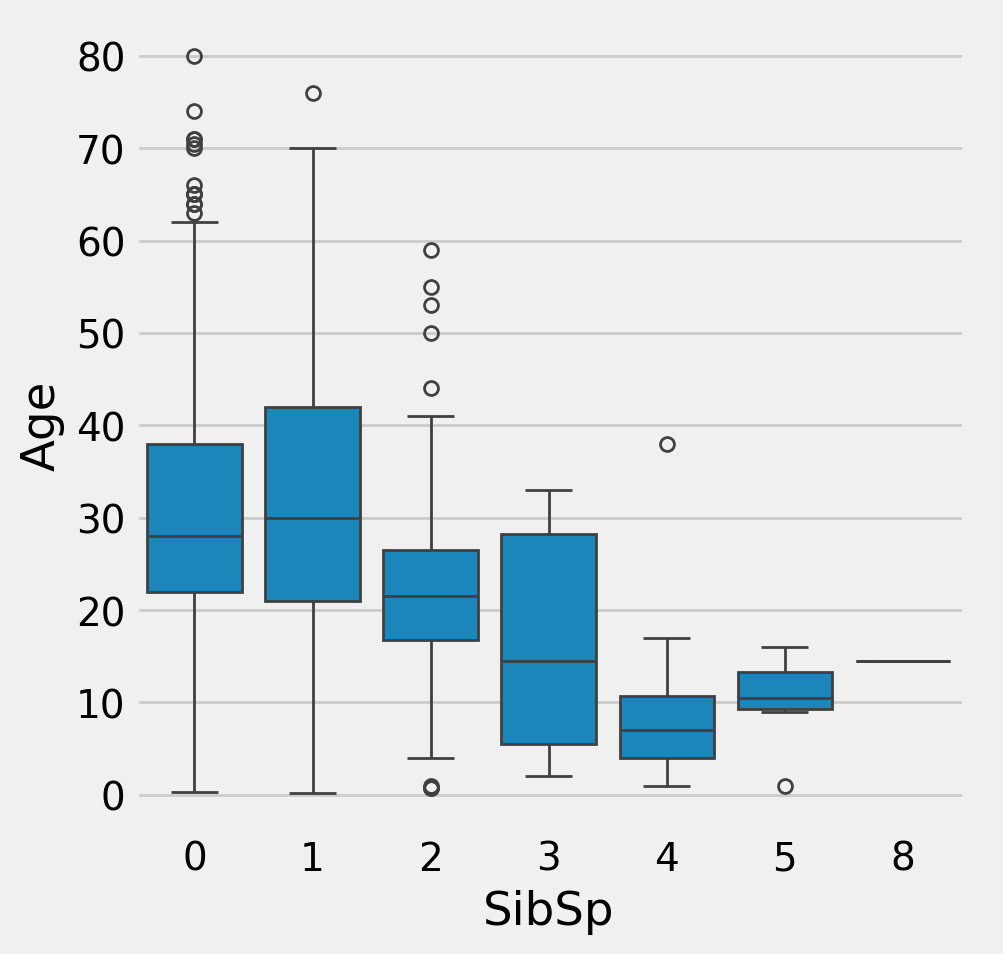

In [ ]:
# Explore Age vs Sex, Parch , Pclass and SibSP

g = sns.catplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.catplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.catplot(y="Age",x="SibSp", data=dataset,kind="box")

In [ ]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

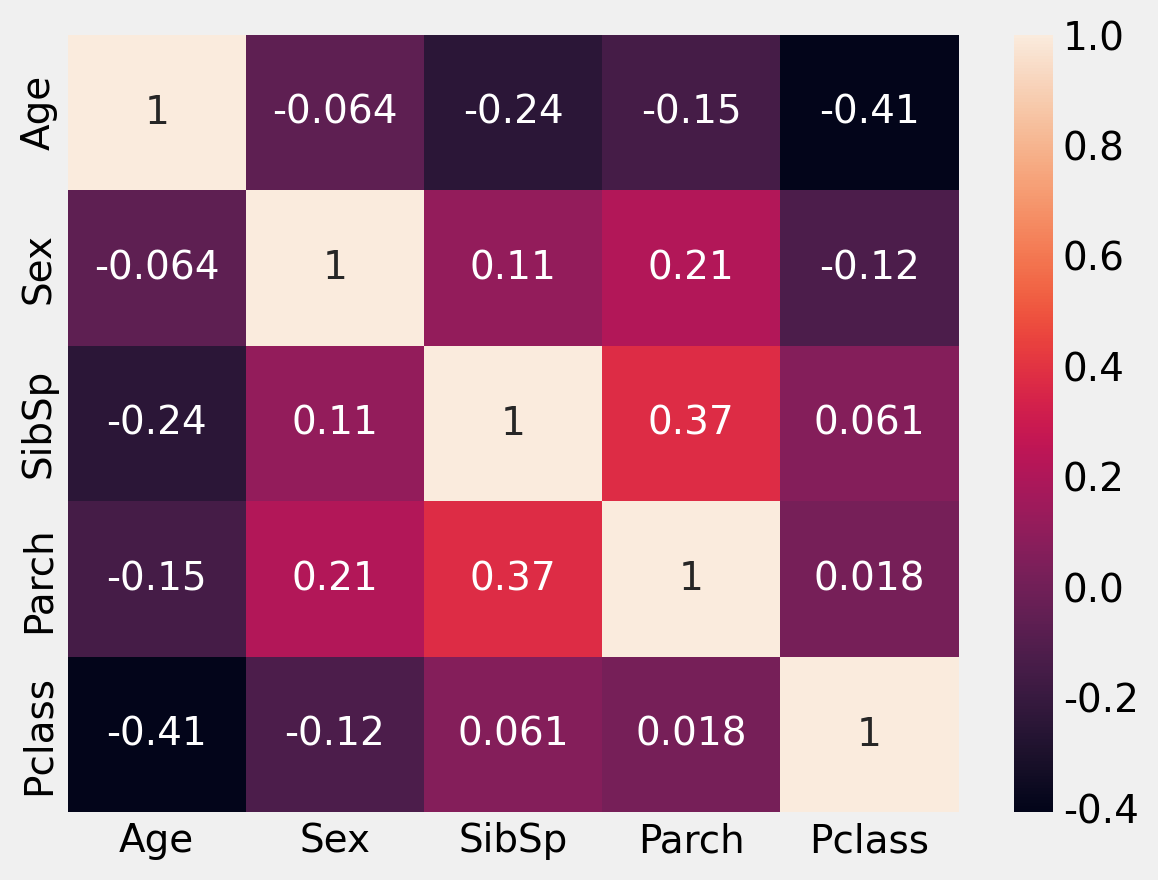

In [ ]:
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)

catplot()에서는 나이가 높을수록 Parch값도 높아짐. (부모님 동반 가족이 많다는 것)

그러나 상관관계는 약한 음(-)을 띔. Parch값이 높아질수록 나이분포가 높아지는 경향을 띄나, 상관관계가 SibSp만큼 크지 않다는 점을 시사

방법: i번째 사람과 형제/배우자 수, 부모/자녀 수, 좌석 등급이 같은 사람들의 나이의 중앙값을 계산해 age_pred에 저장

  * 결측된 Age를 단순 평균으로 채우면 이상치 영향 받음. 비슷한 가족구성/좌석등급의 사람들끼리 나이가 비슷할 가능성이 높으니 이렇게 중앙값으로 채움

In [ ]:
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age:
  age_med = dataset["Age"].median()
  age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
  if not np.isnan(age_pred):
    dataset["Age"].iloc[i] = age_pred
  else:
    dataset["Age"].iloc[i] = age_med

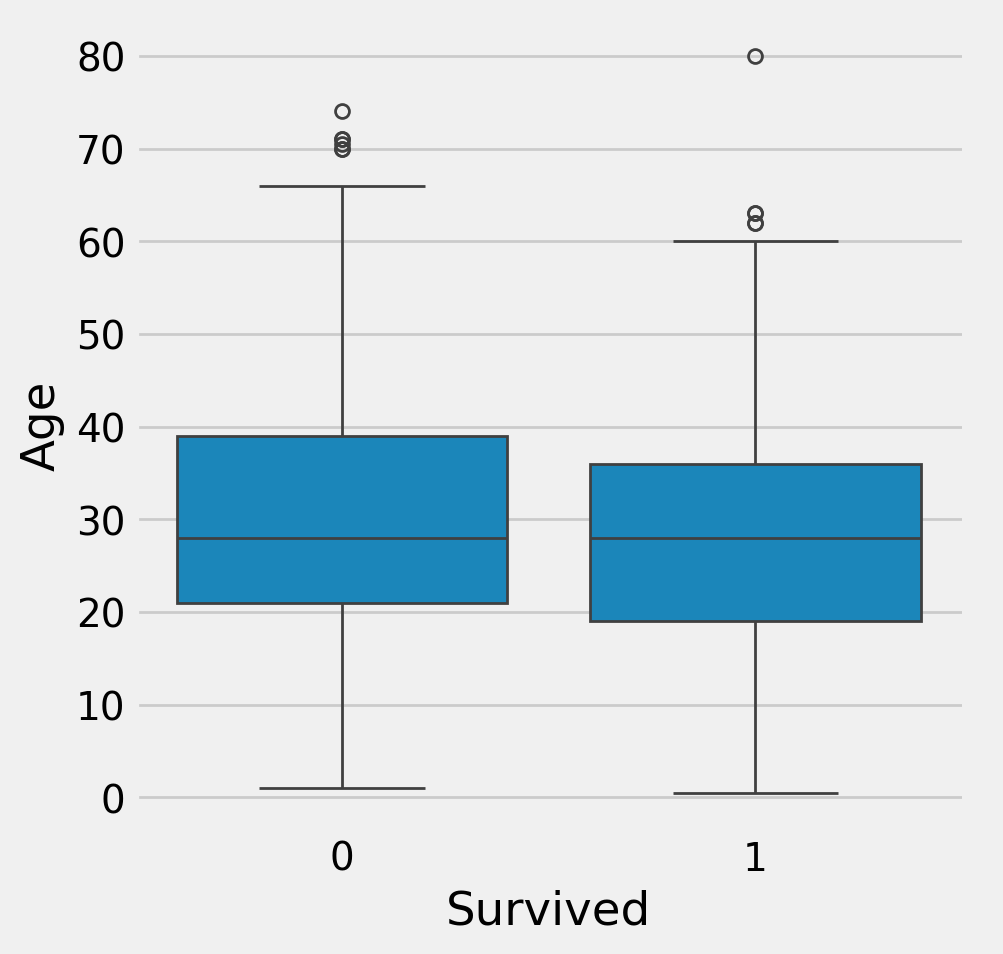

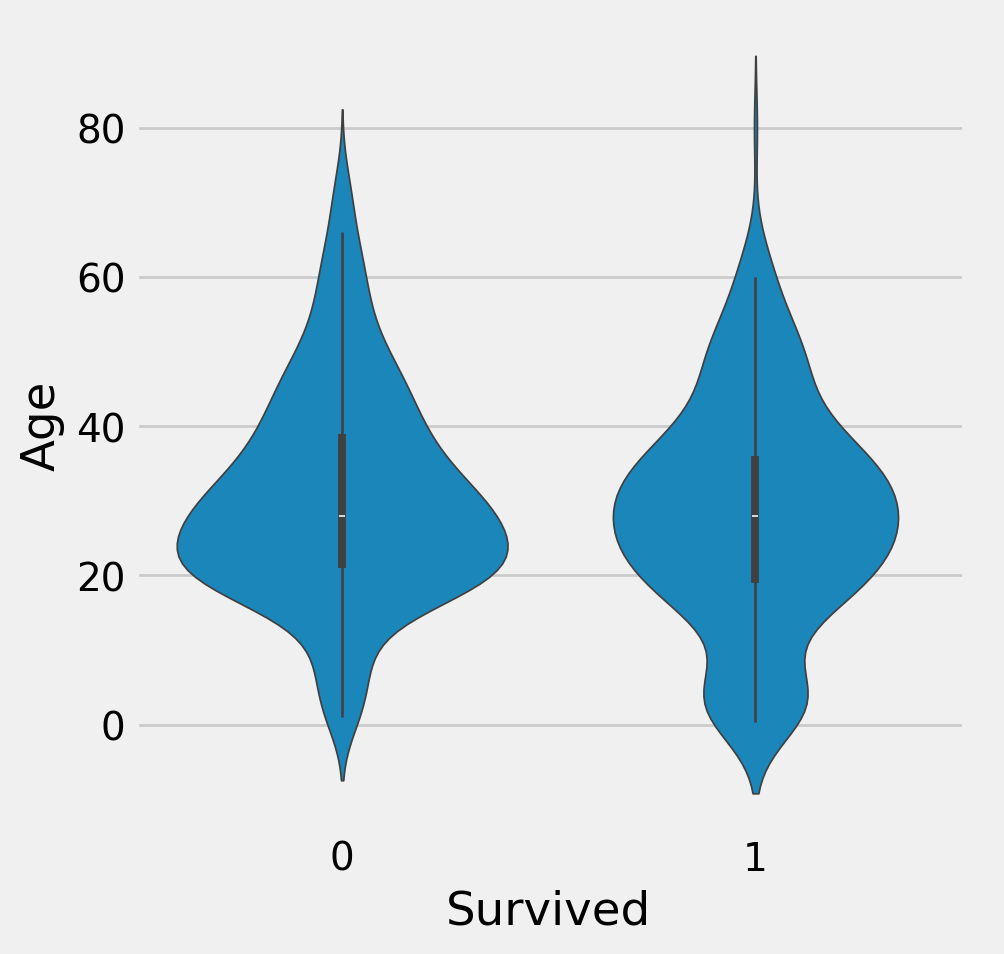

In [ ]:
g = sns.catplot(x="Survived", y = "Age",data = train, kind="box")
g = sns.catplot(x="Survived", y = "Age",data = train, kind="violin")

## 4. 피쳐 엔지니어링

### 4.1 이름

In [ ]:
dataset["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


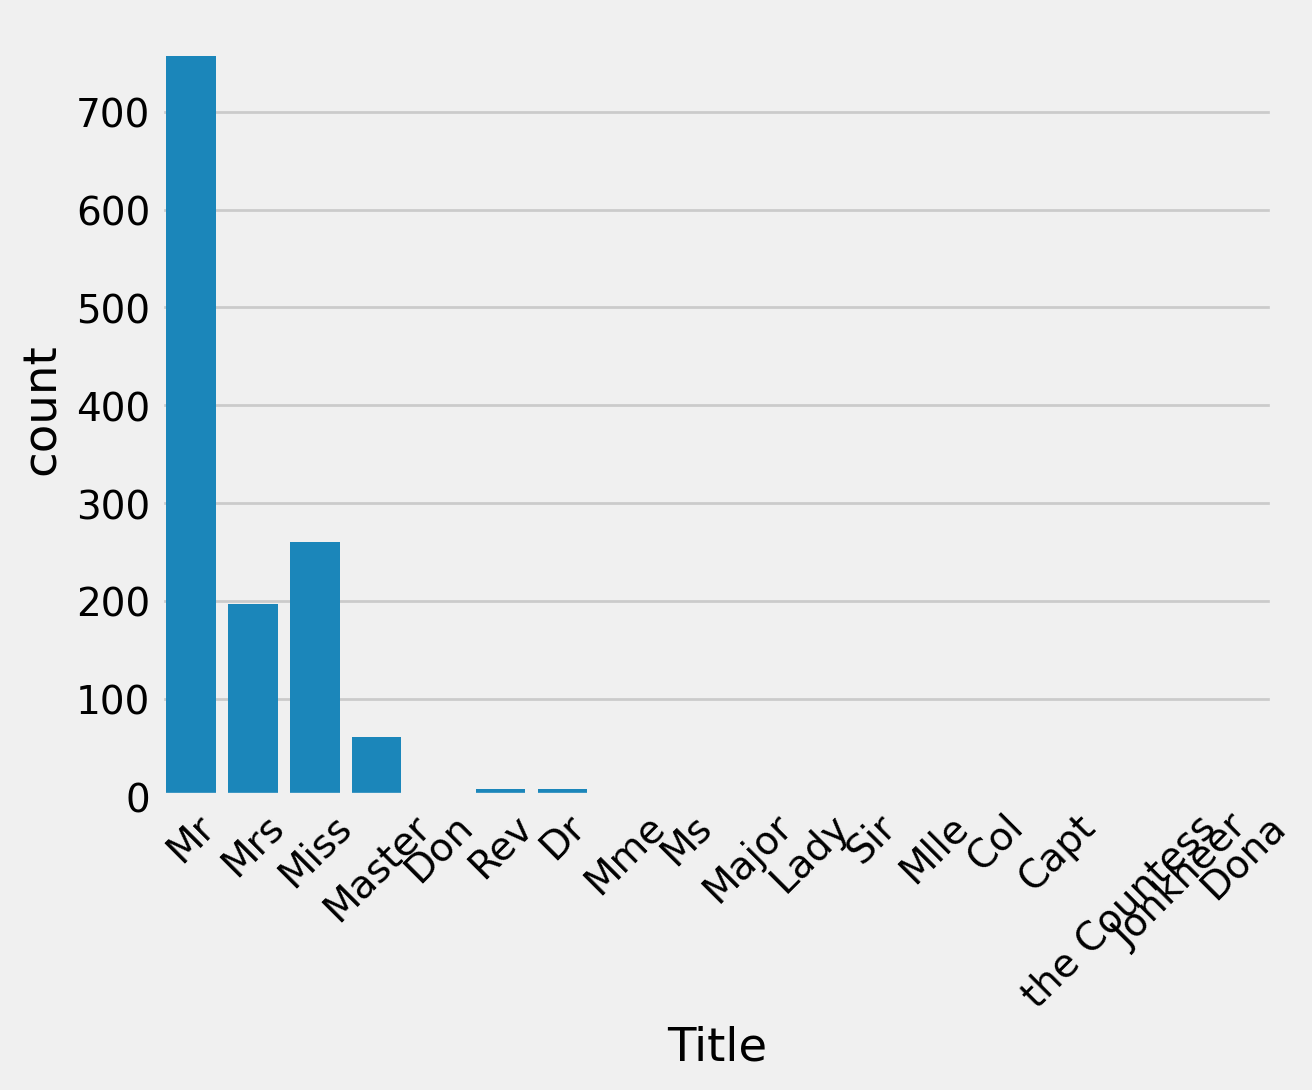

In [ ]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [ ]:
print(dataset["Title"].isnull().sum())
print(dataset["Title"].unique())

0
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


In [ ]:
# Convert to categorical values Title
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

[Text(0, 0, 'Master'),
 Text(1, 0, 'Miss/Ms/Mme/Mlle/Mrs'),
 Text(2, 0, 'Mr'),
 Text(3, 0, 'Rare')]

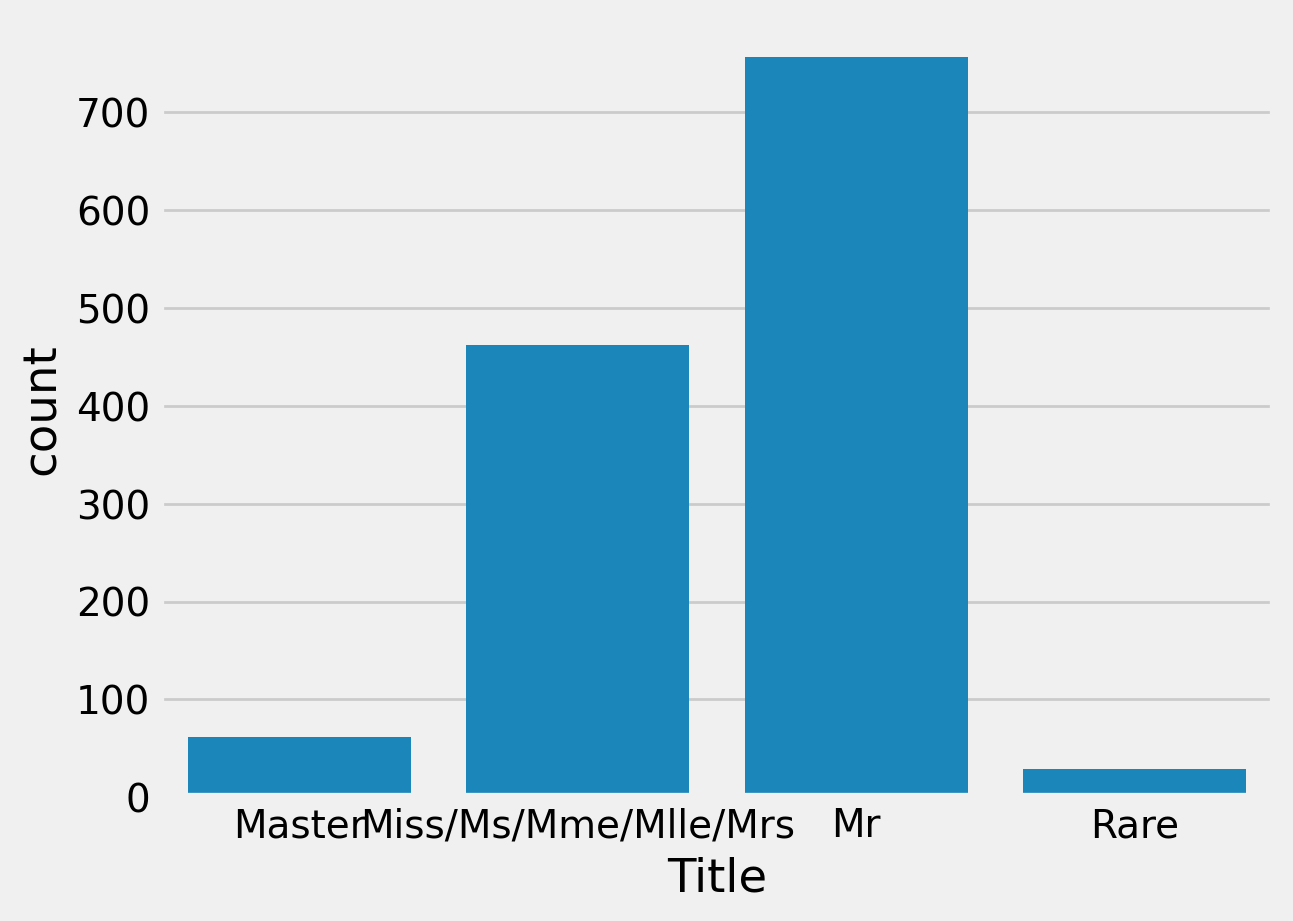

In [ ]:
g = sns.countplot(x="Title", data=dataset) # X축 설정
g.set_xticklabels(["Master", "Miss/Ms/Mme/Mlle/Mrs", "Mr", "Rare"])

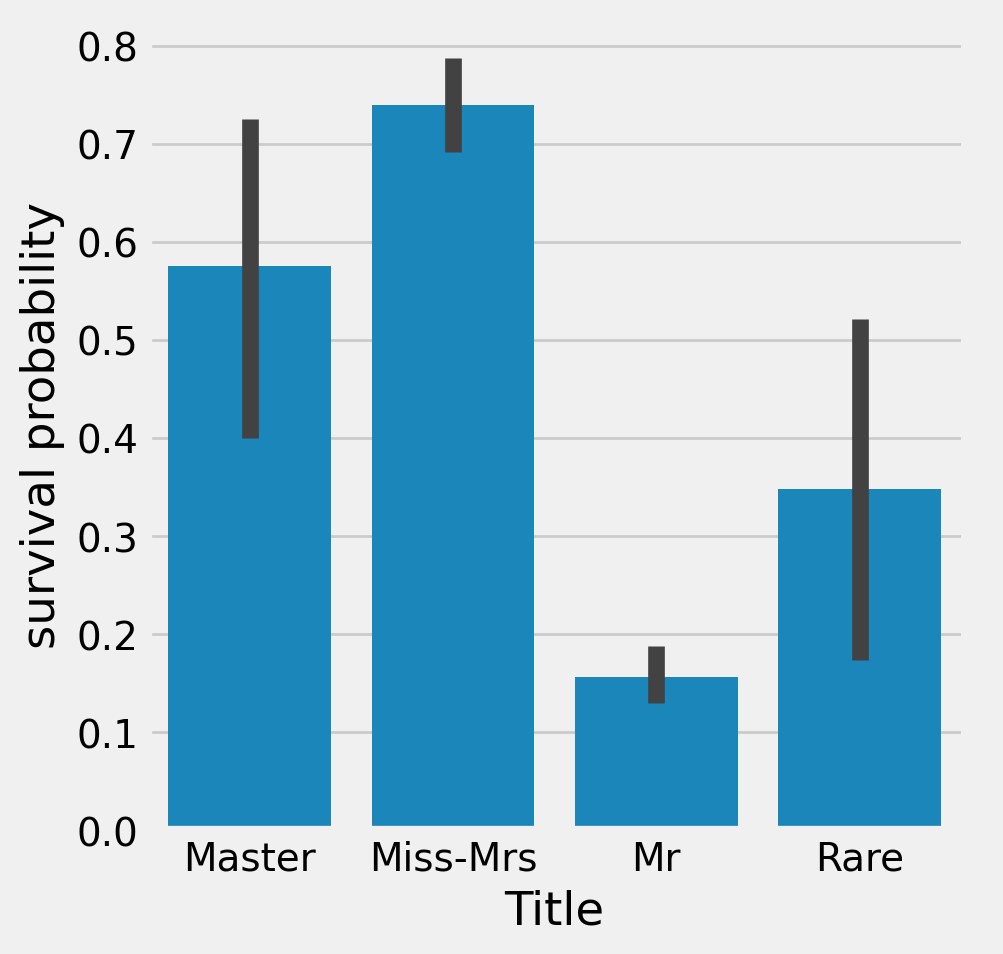

In [ ]:
g = sns.catplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [ ]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

### 4.2 가족 사이즈

In [ ]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

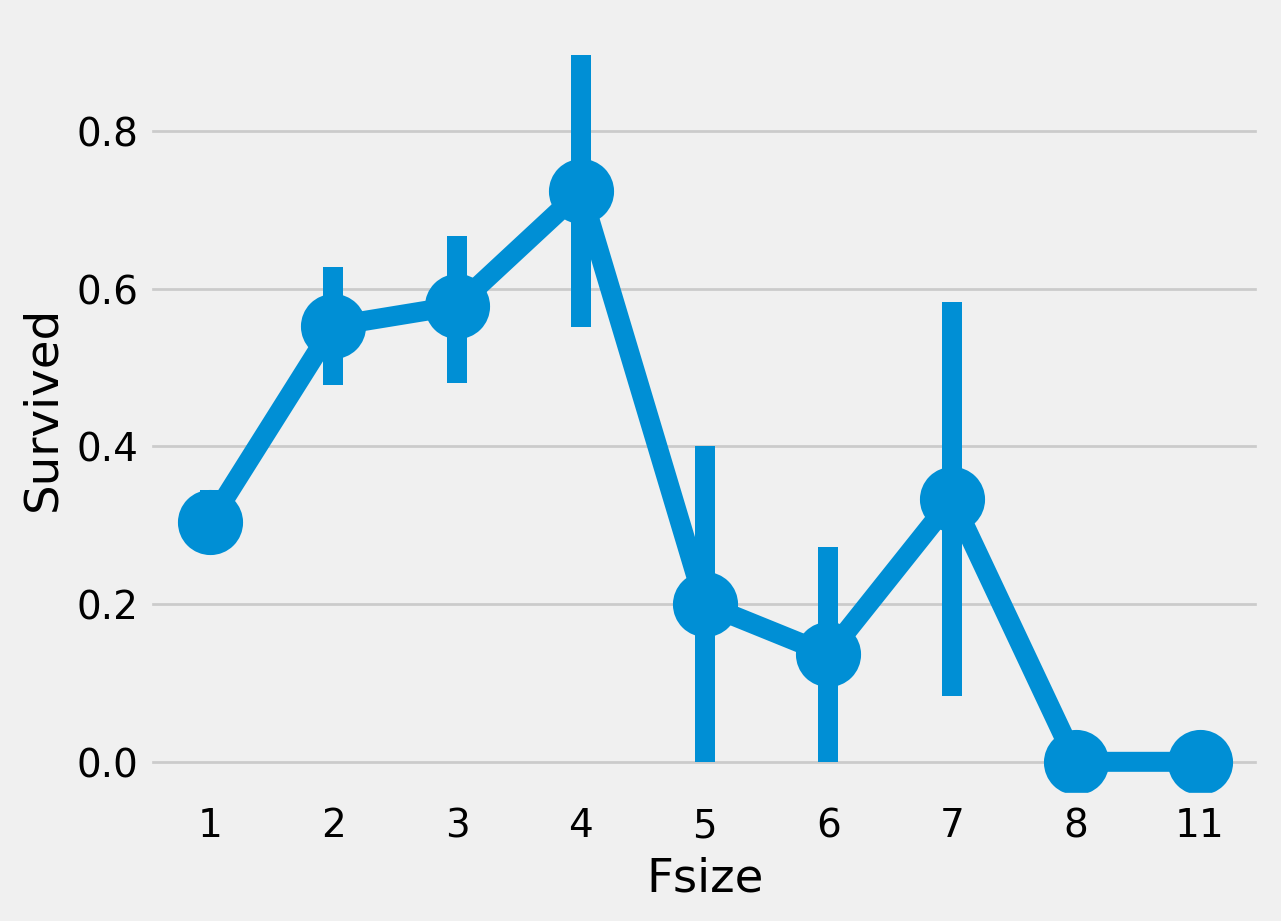

In [ ]:
sns.pointplot(x="Fsize", y="Survived", data=dataset)
g.set_ylabels("Survival Probability")

In [ ]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s ==1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

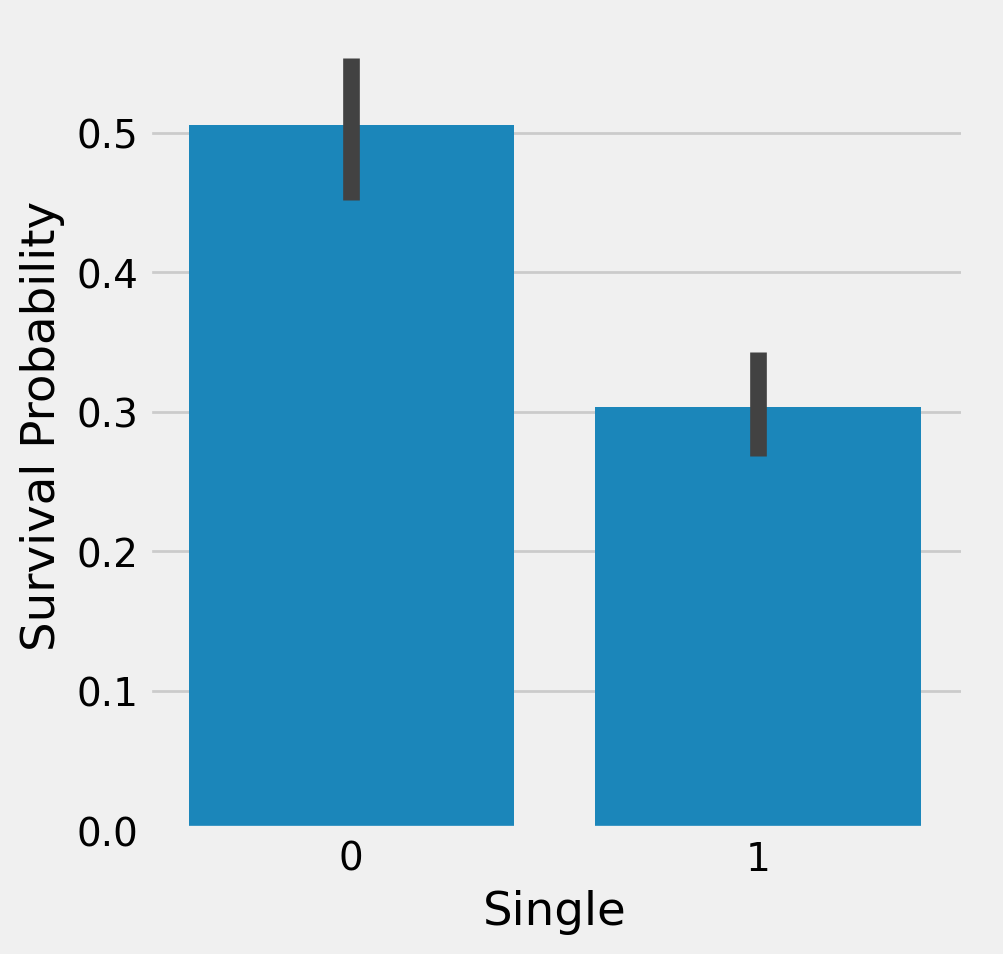

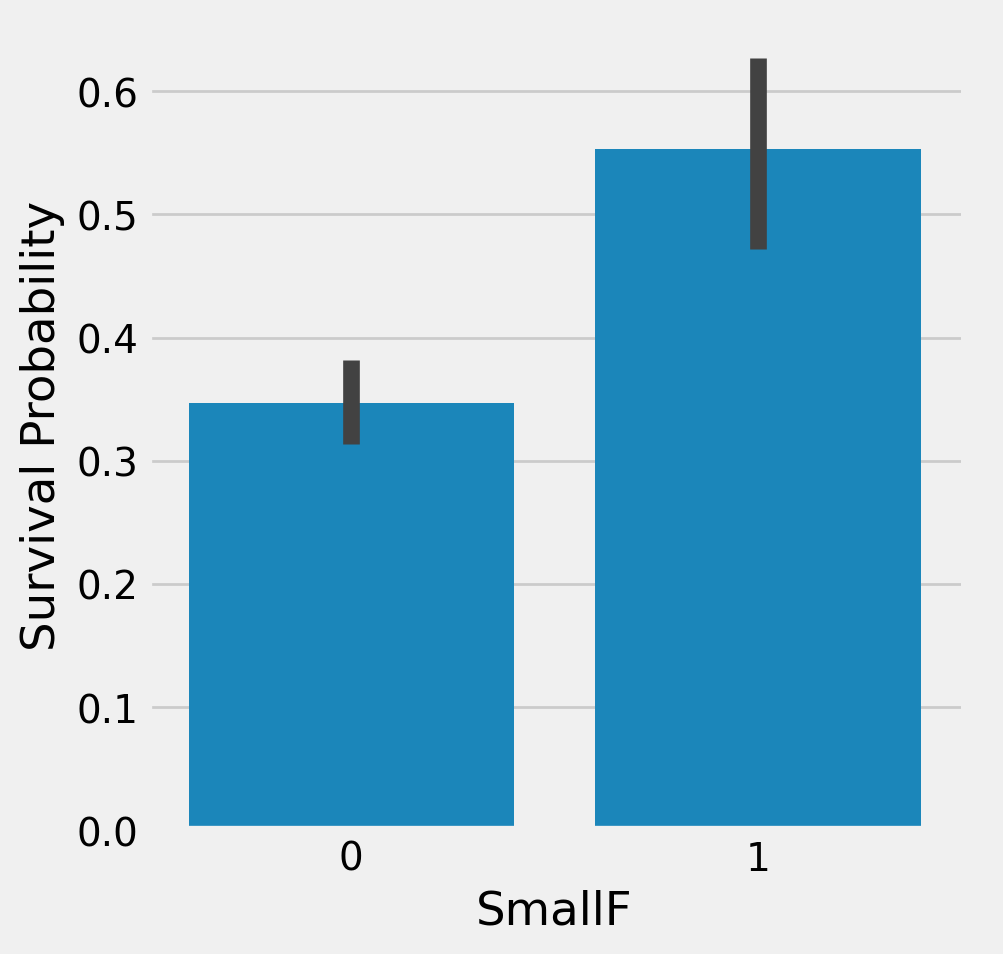

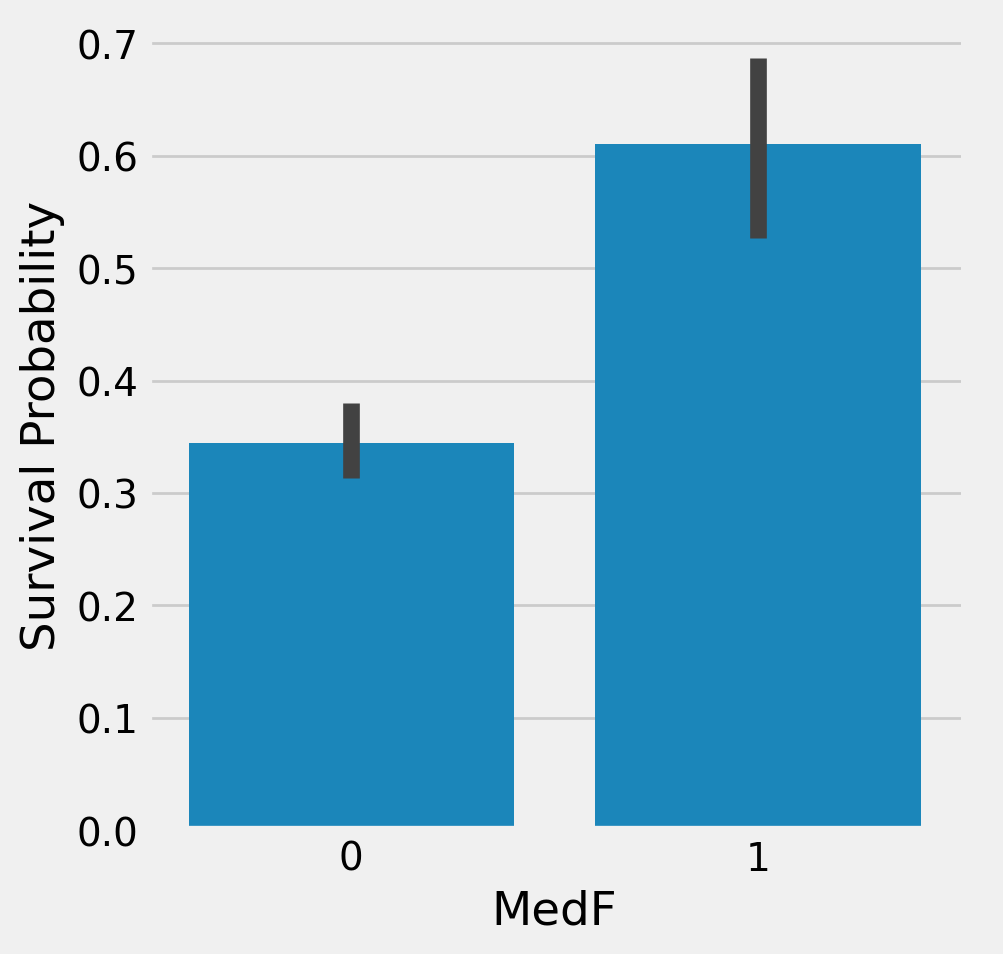

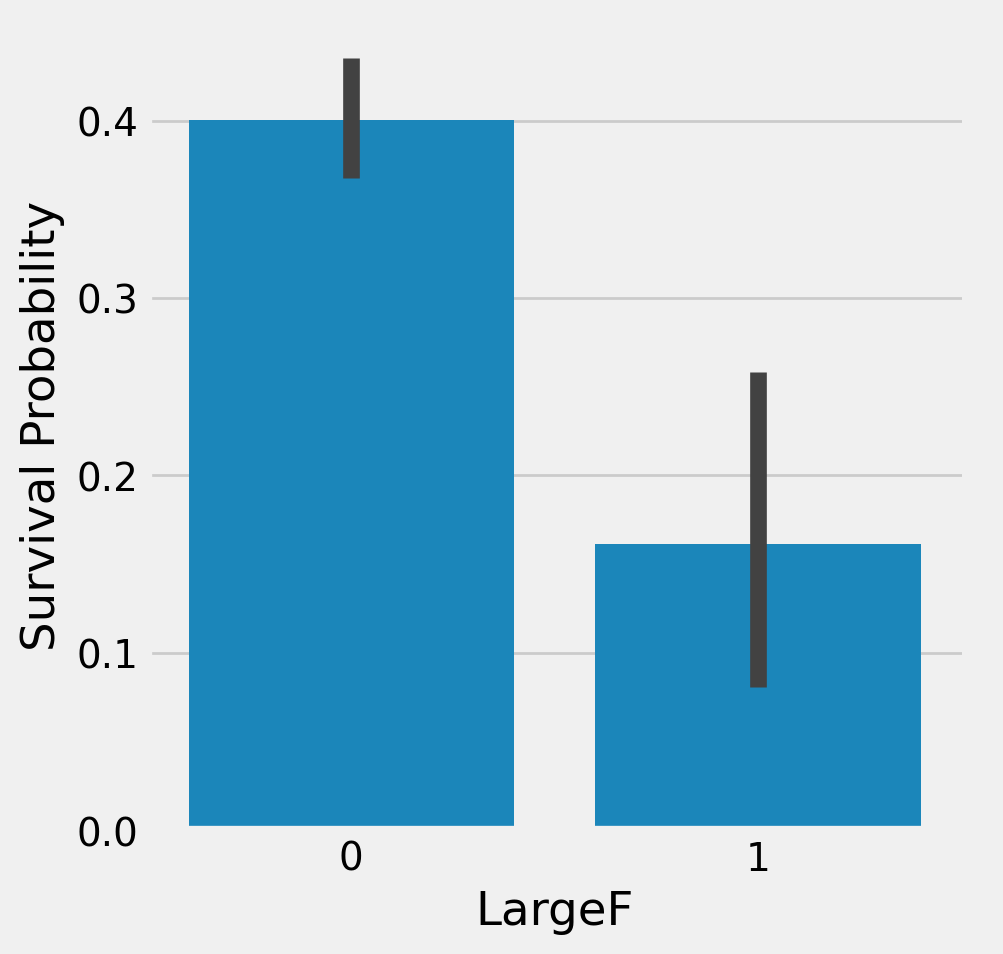

In [ ]:
g = sns.catplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [ ]:
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,False,False,True,False,False,False,True
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,False,True,False,False,True,False,False
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,False,True,False,False,False,False,True
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,False,True,False,False,False,False,True
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,False,False,True,False,False,False,True


### 4.3 캐빈

In [ ]:
dataset["Cabin"].head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [ ]:
dataset["Cabin"].describe()

,Cabin
count,295
unique,186
top,C23 C25 C27
freq,6


In [ ]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103


In [ ]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])

In [ ]:
dataset["Cabin"].value_counts()

,count
Cabin,
X,1014
C,94
B,65
D,46
E,41
A,22
F,21
G,5
T,1


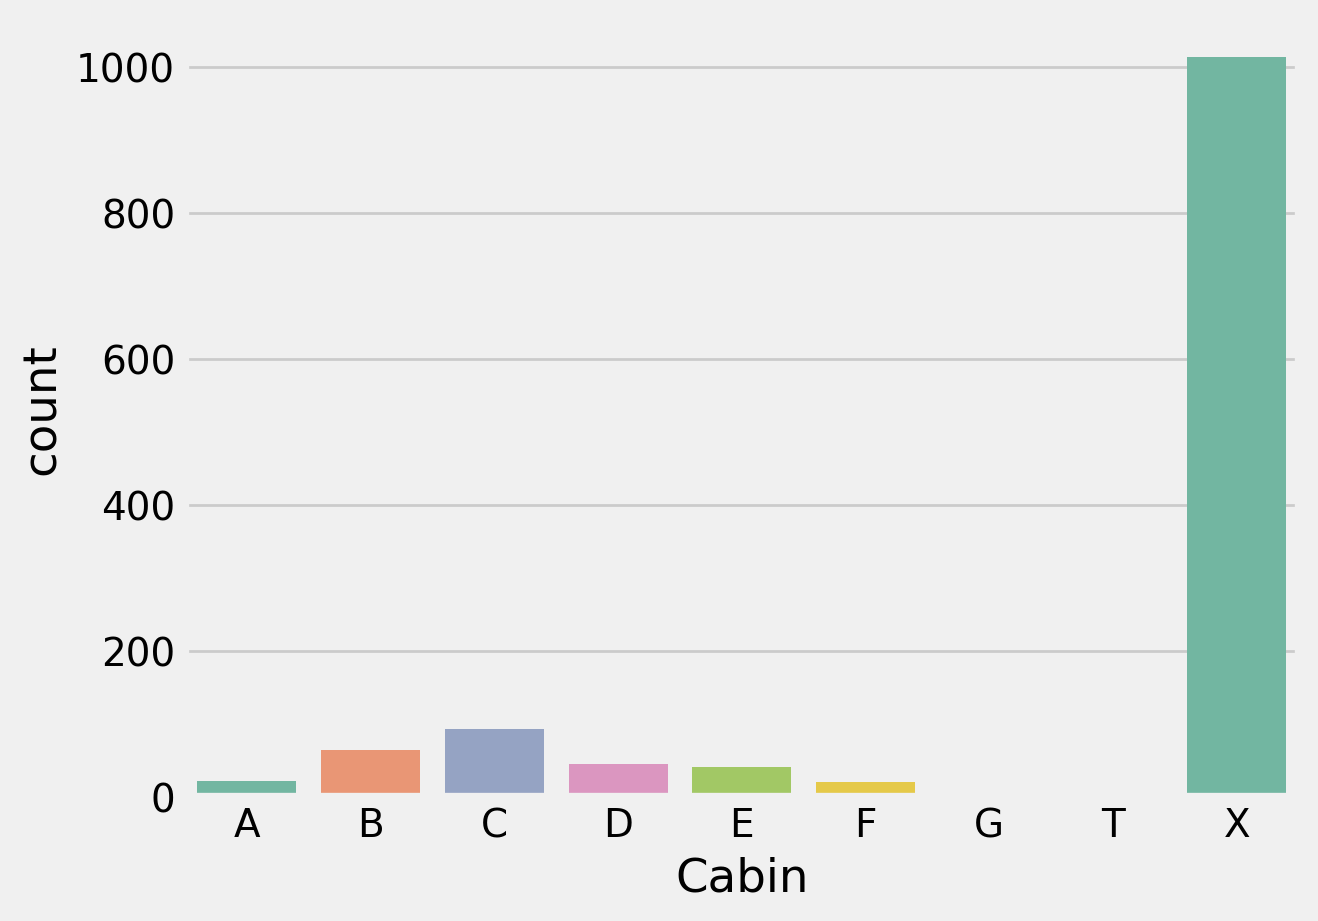

In [ ]:
g = sns.countplot(x="Cabin", data=dataset, palette="Set2", order=['A','B','C','D','E','F','G','T','X'])

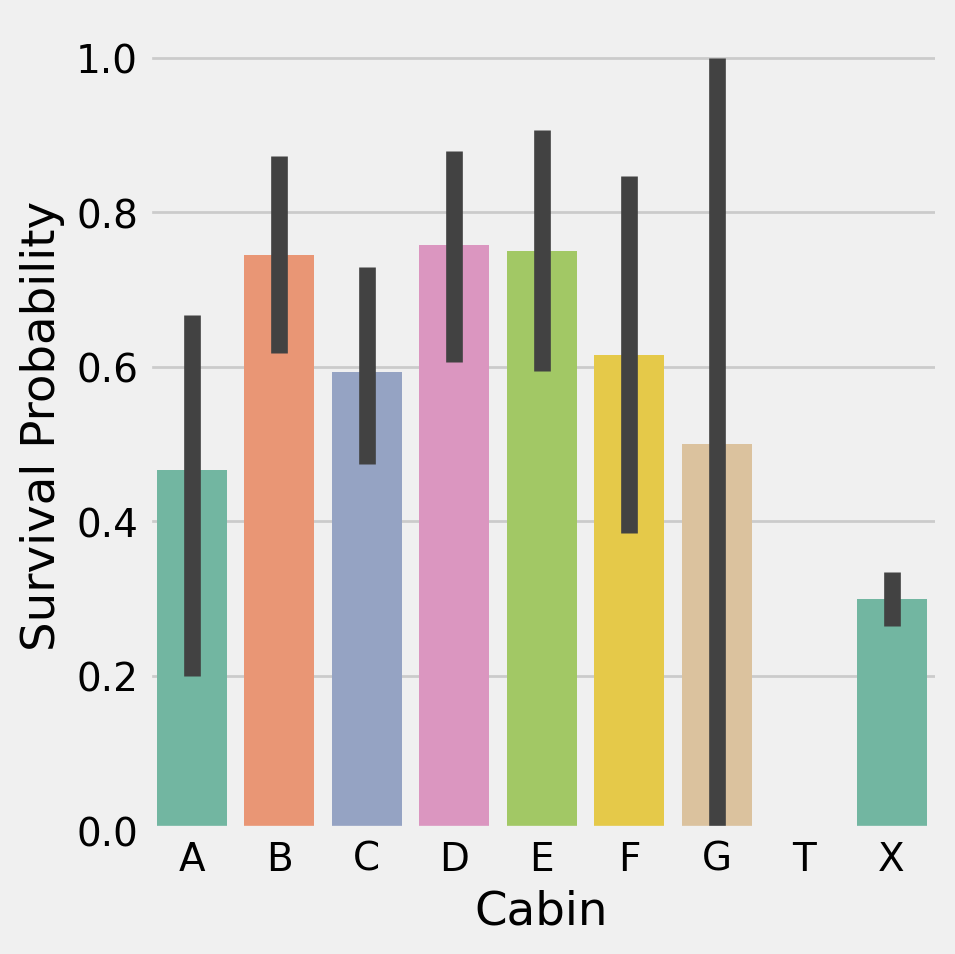

In [ ]:
g = sns.catplot(y="Survived", x="Cabin", data=dataset, palette="Set2", kind="bar", order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

소수 승객을 보유한 cabin은 분산값이 크기에 cabin 자체가 생존율에 유의미한지 판단 보류

그래도 cabin값이 없는 집단 < cabin값이 있는 집단 생존율이 더 큰 것 확인 가능

In [ ]:
dataset = pd.get_dummies(dataset, columns=["Cabin"], prefix="Cabin")

### 4.4 티켓

In [ ]:
dataset["Ticket"].head()

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


In [ ]:
dataset["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
dataset["Ticket"].value_counts()

,count
Ticket,
CA. 2343,11
1601,8
CA 2144,8
347082,7
S.O.C. 14879,7
...,...
A.5. 3236,1
347086,1
365237,1


같은 접두사 = 비슷한 클래스나 생존율을 가질까?

In [ ]:
Ticket = []
for i in list(dataset.Ticket):
  if not i.isdigit():
    Ticket.append(i.replace(".", "").replace("/","").strip().split(' ')[0])
  else:
    Ticket.append("X")
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

,Ticket
0,A5
1,PC
2,STONO2
3,X
4,X


In [ ]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [ ]:
n_unique = len(set(Ticket))
print("Ticket 고유값 개수:", n_unique)

Ticket 고유값 개수: 37


In [ ]:
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [ ]:
# Drop useless variables
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [ ]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0.0,0,22.0,1,0,1.981001,2,0,1,0,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,38.0,1,0,4.266662,2,0,1,0,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,26.0,0,0,2.070022,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
3,1.0,1,35.0,1,0,3.972177,2,0,1,0,...,False,False,False,False,False,False,True,True,False,False
4,0.0,0,35.0,0,0,2.085672,1,1,0,0,...,False,False,False,False,False,False,True,False,False,True


## 5. 모델링

In [ ]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

### 5.1 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. MinMaxScaler 객체 초기화
scaler = MinMaxScaler()

# 2. 훈련 데이터 복사본 생성
scaled = train.copy()

# 3. 연속형 변수(Age, Fare)에 스케일링 적용
scaled[['Age', 'Fare']] = scaler.fit_transform(scaled[['Age', 'Fare']])

# 결과 확인
print(scaled[['Age', 'Fare']].head())

        Age      Fare
0  0.271174  0.317521
1  0.472229  0.683873
2  0.321438  0.331789
3  0.434531  0.636672
4  0.434531  0.334298


In [ ]:
scaled

,Survived,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0.0,0,0.271174,1,0,0.317521,2,0,1,0,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,0.472229,1,0,0.683873,2,0,1,0,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,0.321438,0,0,0.331789,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
3,1.0,1,0.434531,1,0,0.636672,2,0,1,0,...,False,False,False,False,False,False,True,True,False,False
4,0.0,0,0.434531,0,0,0.334298,1,1,0,0,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,0.334004,0,0,0.411118,1,1,0,0,...,False,False,False,False,False,False,True,False,True,False
887,1.0,1,0.233476,0,0,0.545154,1,1,0,0,...,False,False,False,False,False,False,True,True,False,False
888,0.0,1,0.164363,1,2,0.505672,4,0,0,1,...,False,False,False,False,True,False,False,False,False,True
889,1.0,0,0.321438,0,0,0.545154,1,1,0,0,...,False,False,False,False,False,False,True,True,False,False


### 5.2 train/test 분리

In [ ]:
from sklearn.model_selection import train_test_split

X = scaled.drop('Survived', axis=1)  # 'Survived'를 제외한 모든 feature
y = scaled['Survived']  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8022

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       157
         1.0       0.78      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


Confusion Matrix:
[[134  23]
 [ 30  81]]


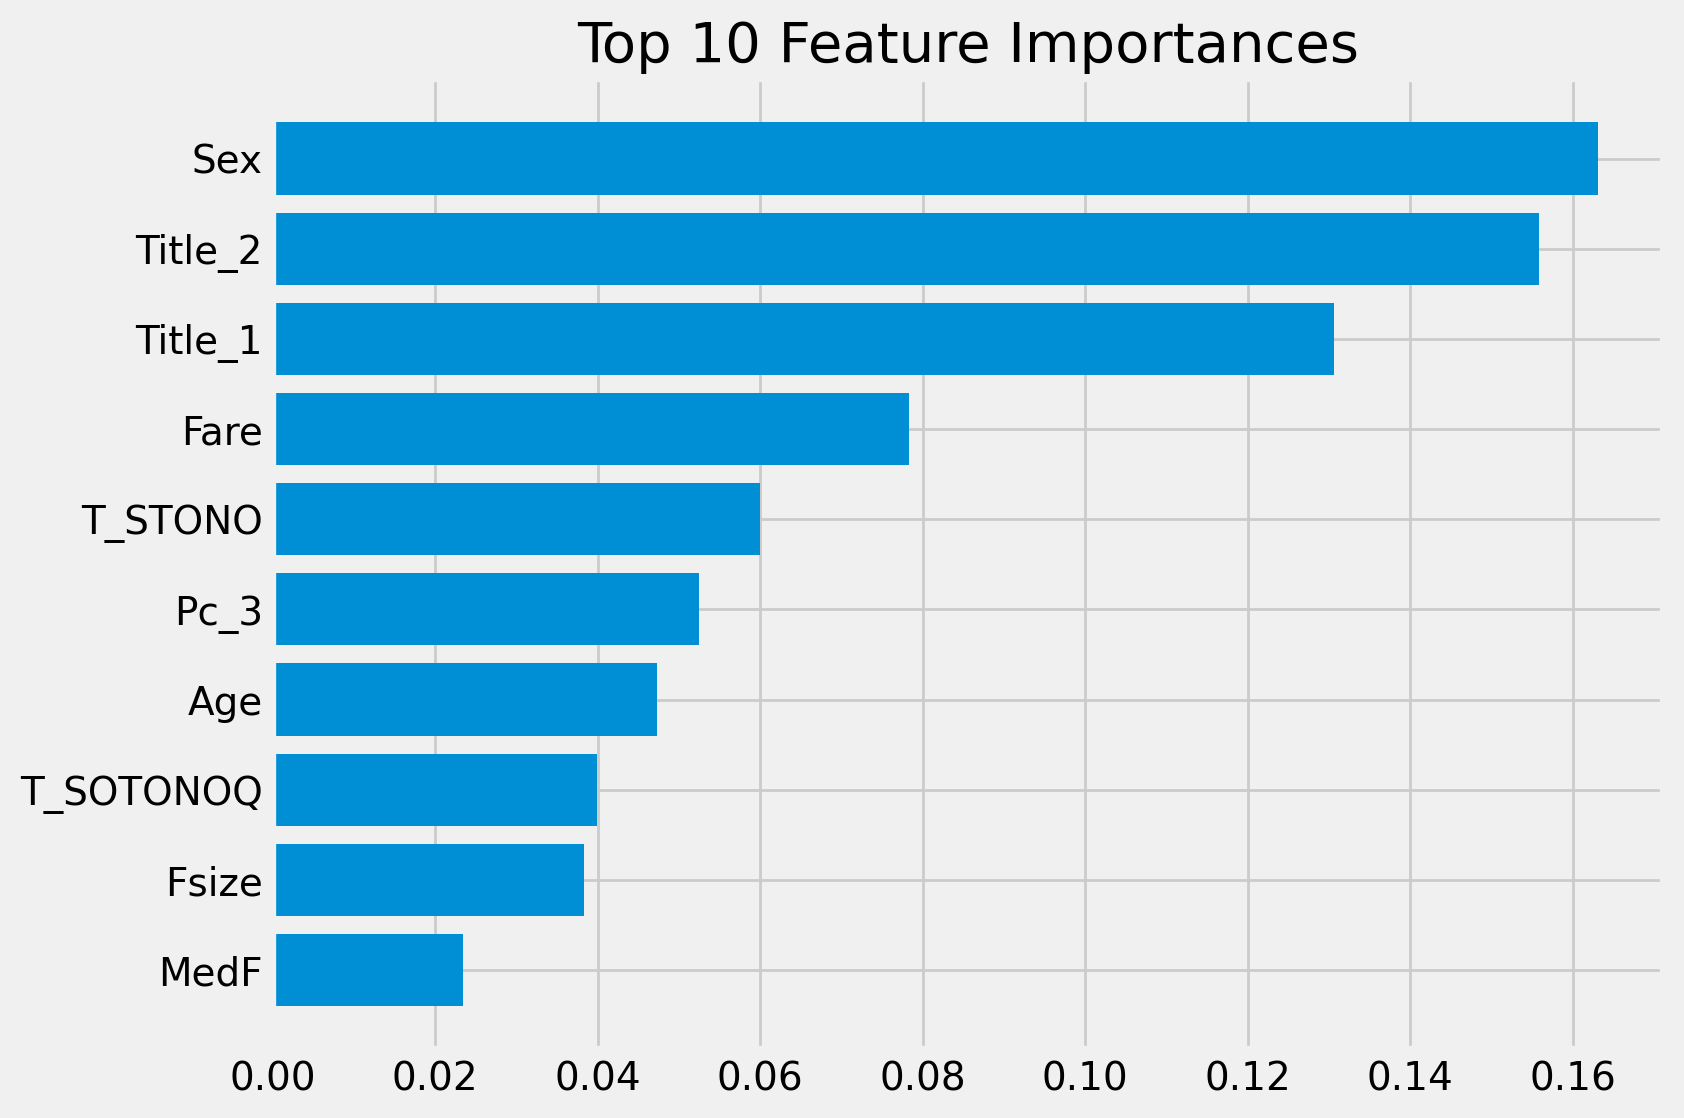

In [ ]:
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': RFC_best.feature_importances_
}).sort_values('importance', ascending=False)

topN = 10
plt.figure(figsize=(8,6))
plt.barh(feat_imp['feature'][:topN][::-1], feat_imp['importance'][:topN][::-1])
plt.title(f'Top {topN} Feature Importances')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 연속형 변수만 스케일링
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

In [ ]:
test

,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,MedF,LargeF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
891,0,0.452723,0,0,0.329840,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,True
892,1,0.617566,1,0,0.311896,2,0,1,0,0,...,False,False,False,False,False,False,True,False,False,True
893,0,0.815377,0,0,0.363976,1,1,0,0,0,...,False,False,False,False,False,False,True,False,True,False
894,0,0.353818,0,0,0.346051,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,True
895,1,0.287881,1,1,0.402083,3,0,0,1,0,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0.327443,0,0,0.334298,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1305,1,0.512066,0,0,0.751796,1,1,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1306,0,0.505473,0,0,0.317521,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1307,0,0.327443,0,0,0.334298,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
# 1. 학습 때 사용한 컬럼 순서와 동일하게 맞추기
#    - X_train.columns를 기준으로 test 데이터셋 재정렬
X_test = test.reindex(columns=X_train.columns, fill_value=0)

# 2. 학습된 모델로 예측 수행
y_pred_test = model.predict(X_test)

# 3. 예측 결과를 test 데이터프레임에 추가
test['Survived'] = y_pred_test

# 4. 최종 결과 확인
test[['Survived']].head()

,Survived
891,0.0
892,0.0
893,0.0
894,0.0
895,0.0


In [ ]:
test['Survived'].value_counts()

,count
Survived,
0.0,255
1.0,163


In [ ]:
from datetime import datetime

feature_importances = model.feature_importances_
features = test.columns

feature_importance_list = list(zip(features, feature_importances))

args.results.append(
    {
        'model': 'forest11',
        'score_tr': '',
        'score_te': '',
        'auc_te': accuracy,
        'len_features': test.shape[1],
        'feature_importances': feature_importance_list,  # 리스트 형태로 저장
        'create_dt': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
)

args.results

[{'model': 'forest11',
  'score_tr': '',
  'score_te': '',
  'auc_te': 0.8022388059701493,
  'len_features': 67,
  'feature_importances': [('Sex', np.float64(0.08510676116428466)),
   ('Age', np.float64(0.17612395492863459)),
   ('SibSp', np.float64(0.02395695758568633)),
   ('Parch', np.float64(0.019196720804429575)),
   ('Fare', np.float64(0.1662490096059713)),
   ('Fsize', np.float64(0.032083446561164804)),
   ('Single', np.float64(0.005528867618887489)),
   ('SmallF', np.float64(0.007591165486845535)),
   ('MedF', np.float64(0.013062877088303003)),
   ('LargeF', np.float64(0.013026217355676297)),
   ('Title_0', np.float64(0.009089061115220863)),
   ('Title_1', np.float64(0.09834212873264318)),
   ('Title_2', np.float64(0.09850078162755152)),
   ('Title_3', np.float64(0.0059609546587636964)),
   ('Em_C', np.float64(0.01688282165861488)),
   ('Em_Q', np.float64(0.008432551897837658)),
   ('Em_S', np.float64(0.015608521473179144)),
   ('Cabin_A', np.float64(0.0029486914042987145)),
  

In [ ]:
# 결과 출력 단계

    # 👇 여기에 코드를 작성하세요.
# 1. 모델별 결과 확인
#    → 반복문을 돌면서 각 결과(result)의 모델명, 테스트 AUC 점수, 생성 일자를 출력합니다.

# 2. 특정 모델 결과만 추출
#    → 예: 'forest11' 모델의 결과만 리스트로 필터링

# 1. 모델별 결과 확인 (지정된 출력 포맷)
for result in args.results:
    print(f"Model: {result['model']}, "
          f"AUC: {result['auc_te']}, "
          f"Date: {result['create_dt']}")

# 2. 특정 모델 결과만 추출 (예: 'forest11')
target_model = 'forest11'
forest11_results = [r for r in args.results if r['model'] == target_model]

print("\n=== Filtered Results ===")
for r in forest11_results:
    print(f"Model: {r['model']}, "
          f"AUC: {r['auc_te']}, "
          f"Date: {r['create_dt']}")

Model: forest11, AUC: 0.8022388059701493, Date: 2025-09-05 08:27:30

=== Filtered Results ===
Model: forest11, AUC: 0.8022388059701493, Date: 2025-09-05 08:27:30


In [ ]:
model_result_df = pd.DataFrame(args.results)

In [ ]:
# AUC 값을 기준으로 내림차순 정렬
sorted_results = model_result_df.sort_values(by='auc_te', ascending=False)

In [ ]:
# 가장 높은 AUC를 가진 모델의 예측값 선택
best_model = sorted_results.iloc[0]
best_model_predictions = best_model['feature_importances']

In [ ]:
import os
#휘발성이므로 런타임 해제될 시 확인 불가. 따라서 json/csv로 저장하는 것이 권장

today_results = pd.DataFrame(args.results)

file_path = 'model_results.csv'

if os.path.exists(file_path):
    existing_results = pd.read_csv(file_path)
    combined_results = pd.concat([existing_results, today_results], ignore_index=True)
else:
    combined_results = today_results

combined_results.to_csv(file_path, index=False)

print(f"Results have been saved to {file_path}")

Results have been saved to model_results.csv


In [ ]:
submission['Survived'].value_counts()

,count
Survived,
0.0,255
1.0,163


In [ ]:
train['Survived'].value_counts()

,count
Survived,
0.0,549
1.0,342
